In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfnew = pd.read_csv('AnalisiHierarchical.csv', skipinitialspace=True, sep=',') 
# voi importate il vostro file, poi non dovete cambiare altro. il resto dell'analisi si adatta di conseguenza
# fatemi sapere se vi restituisce errore

In [3]:
dfnew

PurchDate     Model  SubModel  VehYear  RefId  IsBadBuy  Auction  \
0      2009-07-28  1500 RAM   EXT CAB     2001  61608         1    ADESA   
1      2009-07-28  1500 RAM   EXT CAB     2001  61608         1    ADESA   
2      2009-02-25  1500 RAM  MEGA CAB     2006  50261         0  MANHEIM   
3      2009-01-12  1500 RAM  MEGA CAB     2006  33703         0  MANHEIM   
4      2009-01-12  1500 RAM  MEGA CAB     2006  33703         0  MANHEIM   
...           ...       ...       ...      ...    ...       ...      ...   
50845  2009-03-03    ZEPHYR     SEDAN     2006  32556         0  MANHEIM   
50846  2009-04-14    ZEPHYR     SEDAN     2006  33398         0  MANHEIM   
50847  2010-09-22    ZEPHYR     SEDAN     2006  42247         1    OTHER   
50848  2010-07-14    ZEPHYR     SEDAN     2006  70031         0    ADESA   
50849  2010-10-11    ZEPHYR     SEDAN     2006  64639         0    ADESA   

       VehicleAge     Make    Engine  ... WarrantyCost Doors  TotalPrice  \
0               8    DODGE      5.2L  ...         1054    4D      5369.0   
1               8    DODGE      5.2L  ...         1054    4D      5369.0   
2               3    DODGE      5.7L  ...          920   NaN     11755.0   
3               3    DODGE      5.7L  ...          983   NaN     12498.0   
4               3    DODGE      5.7L  ...          983   NaN     12498.0   
...           ...      ...       ...  ...          ...   ...         ...   
50845           3  LINCOLN       NaN  ...         1118    4D     10333.0   
50846           3  LINCOLN  3.0L SFI  ...         1118    4D     11383.0   
50847           4  LINCOLN       NaN  ...         1272    4D     10277.0   
50848           4  LINCOLN       NaN  ...         1272    4D      9887.0   
50849           4  LINCOLN       NaN  ...         1272    4D      9587.0   

       CostOverOdo labels_DBSCAN Label5complete Label4complete  \
0         0.078288             0              3              3   
1         0.078288             0              3              3   
2         0.148980             0              1              1   
3         0.142777             0              1              1   
4         0.142777             0              1              1   
...            ...           ...            ...            ...   
50845     0.133597             0              1              1   
50846     0.150354             0              1              1   
50847     0.124830             0              1              1   
50848     0.121686             0              1              1   
50849     0.113031             0              1              1   

       Label3complete  Label5ward  Label6ward  
0                   0           1           0  
1                   0           1           0  
2                   0           2           2  
3                   0           2           2  
4                   0           2           2  
...               ...         ...         ...  
50845               0           4           4  
50846               0           4           4  
50847               0           2           2  
50848               0           4           4  
50849               0           2           2  

[50850 rows x 36 columns]

In [4]:
df = pd.read_csv('Training_DU_Clustering_forResultsAnalysis.csv', skipinitialspace=True, sep=',')  

In [5]:
df["Label5complete"] = dfnew["Label5complete"]

In [6]:
df["Label4complete"] = dfnew["Label4complete"]

In [7]:
df["Label3complete"] = dfnew["Label3complete"]

In [8]:
df["Label5ward"] = dfnew["Label5ward"]

In [9]:
df["Label6ward"] = dfnew["Label6ward"]

In [10]:
Labels = df.columns[-5]
Labels

'Label5complete'

In [11]:
df["PurchDate"].nunique()

515

In [12]:
df['PurchDate'] = pd.to_datetime(df['PurchDate']).dt.to_period('M')
df['PurchDate']

0        2009-07
1        2009-07
2        2009-02
3        2009-01
4        2009-01
          ...   
50901    2009-03
50902    2009-04
50903    2010-09
50904    2010-07
50905    2010-10
Name: PurchDate, Length: 50906, dtype: period[M]

In [13]:
df["PurchDate"].nunique()

24

In [14]:
categorical_columns = list()

for col in df.columns:
    if df[col].nunique() < 50:
        print('Numero di valori unici della variabile ' + str(col) + ':', str(df[col].nunique()))
        categorical_columns.append(col)
        
categorical_columns.remove(Labels)
categorical_columns.remove('VehYear')
categorical_columns

Numero di valori unici della variabile PurchDate: 24
Numero di valori unici della variabile SubModel: 38
Numero di valori unici della variabile VehYear: 10
Numero di valori unici della variabile IsBadBuy: 2
Numero di valori unici della variabile Auction: 3
Numero di valori unici della variabile VehicleAge: 10
Numero di valori unici della variabile Make: 32
Numero di valori unici della variabile Transmission: 2
Numero di valori unici della variabile WheelTypeID: 3
Numero di valori unici della variabile Nationality: 2
Numero di valori unici della variabile Size: 12
Numero di valori unici della variabile TopThreeAmericanName: 4
Numero di valori unici della variabile VNST: 37
Numero di valori unici della variabile IsOnlineSale: 2
Numero di valori unici della variabile Doors: 4
Numero di valori unici della variabile Label5complete: 5
Numero di valori unici della variabile Label4complete: 4
Numero di valori unici della variabile Label3complete: 3
Numero di valori unici della variabile Label5

['PurchDate',
 'SubModel',
 'IsBadBuy',
 'Auction',
 'VehicleAge',
 'Make',
 'Transmission',
 'WheelTypeID',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'VNST',
 'IsOnlineSale',
 'Doors',
 'Label4complete',
 'Label3complete',
 'Label5ward',
 'Label6ward']

** CrossTab di ciascun attributo categorico **




Absolute Crosstab: 
 Label5complete  0.0   1.0  2.0  3.0  4.0
PurchDate                               
2009-01          50   889  554  294   74
2009-02          74  1020  642  389   52
2009-03          57  1051  609  305   70
2009-04          62  1227  727  412   74
2009-05          62   914  612  417   63
2009-06          43   830  536  285   51
2009-07          56  1062  612  470   54
2009-08          79  1085  661  517   55
2009-09          81  1053  640  456   53
2009-10          71  1283  705  513   67
2009-11          58   836  482  376   41
2009-12          66   759  420  356   28
2010-01          96  1032  569  494   62
2010-02          83   978  576  536   38
2010-03          87   887  562  433   48
2010-04          65   955  536  462   49
2010-05          77   862  515  423   43
2010-06          83   966  565  469   61
2010-07          72  1148  610  400   51
2010-08          64   848  528  383   52
2010-09          71  1098  617  487   48
2010-10          90  1157  616  4

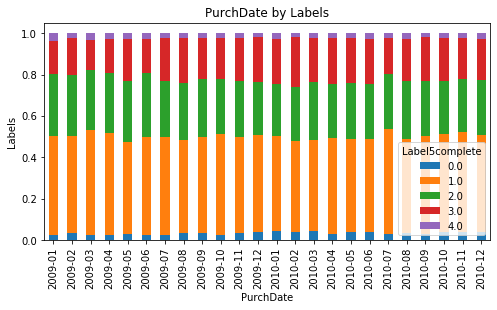




Absolute Crosstab: 
 Label5complete        0.0    1.0   2.0   3.0  4.0
SubModel                                         
ACCESS CAB              0      2     1     0    0
BASE                    0      0     0     1    0
CARGO                   0      1     0     0    0
CARGO EXT               0      0     2     0    0
CONVERTIBLE            22    169    59    92   16
CONVERTIBLE HARDTOP     0      2     0     0    0
CONVERTIBLE SUV         0      1     1     0    0
COUPE                  59    899   546   327   71
COUPE QUAD              5     55    25    22    3
CREW CAB                1    156   149    15    4
CROSSOVER               3     21    15     4    0
CUV                    17    626   440   123   28
DOUBLE CAB              0      5     7     0    0
EXT CAB                13    432   362    77   14
HARDTOP                 0      2     0     2    0
HATCHBACK              11     88    51    31    4
JEEP                    0      2     3     1    0
LIFTBACK                0 

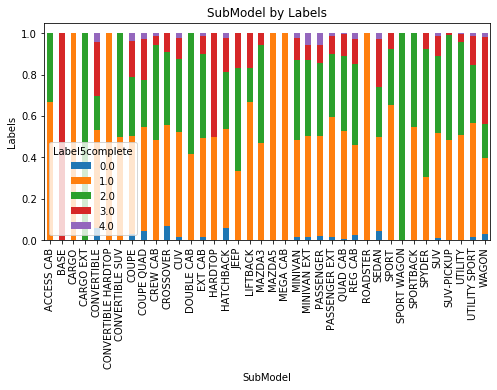




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0   3.0   4.0
IsBadBuy                                      
0               1501  20907  12024  8968  1048
1                194   2896   1891  1169   252


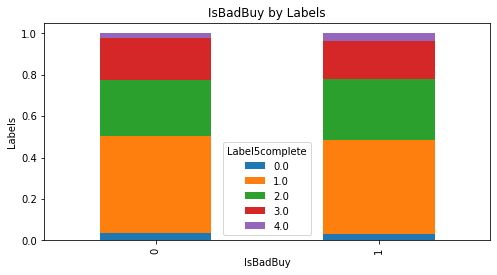




Absolute Crosstab: 
 Label5complete  0.0    1.0   2.0   3.0  4.0
Auction                                    
ADESA           317   4883  2919  1789  260
MANHEIM         808  13709  8055  4907  754
OTHER           570   5211  2941  3441  286


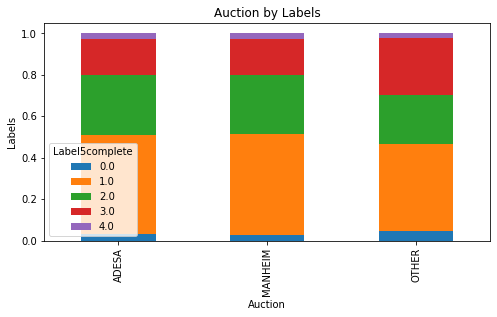




Absolute Crosstab: 
 Label5complete  0.0   1.0   2.0   3.0  4.0
VehicleAge                                
0                 0     0     0     1    0
1               245   579   267  1214   26
2               321  2613  1146  2007   38
3               381  5590  2605  2231   98
4               329  5720  3109  2151  236
5               216  4302  2758  1263  268
6               107  2665  1990   645  234
7                53  1458  1266   404  231
8                37   690   593   172  115
9                 6   186   181    49   54


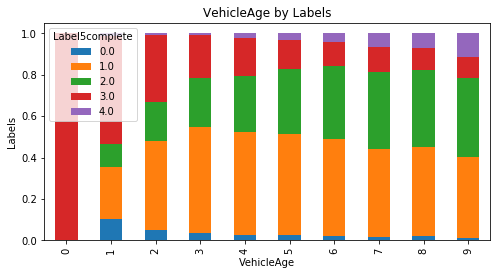




Absolute Crosstab: 
 Label5complete  0.0   1.0   2.0   3.0  4.0
Make                                      
ACURA             1    14     6     4    0
BUICK            12   270   184    56   27
CADILLAC          0    14     7     4    0
CHEVROLET       280  6100  3670  1714  224
CHRYSLER        368  2610  1277  1974  114
DODGE           320  3280  1839  2626  140
FORD             72  3669  2781   704  409
GMC               1   220   169    20    3
HONDA             3   177   145    44    7
HUMMER            0     1     0     0    0
HYUNDAI          60   689   245   369   31
INFINITI          2    14    11     8    1
ISUZU             2    61    20    20    0
JEEP              7   604   361    93   16
KIA             172   758   226   682   13
LEXUS             0    12    11     1    3
LINCOLN           4    33    19     9    2
MAZDA             6   410   221   103    7
MERCURY           5   308   279    54   53
MINI              1    10     5     0    1
MITSUBISHI       21   408   18

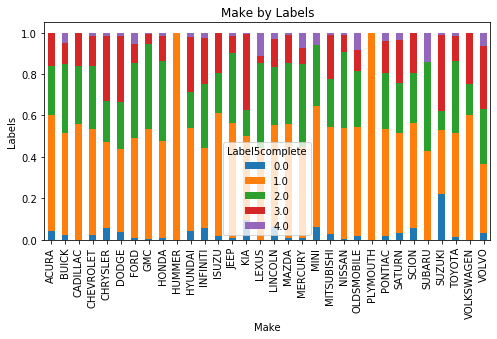




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0   3.0   4.0
Transmission                                  
AUTO            1587  22937  13470  9690  1259
MANUAL           108    866    445   447    41


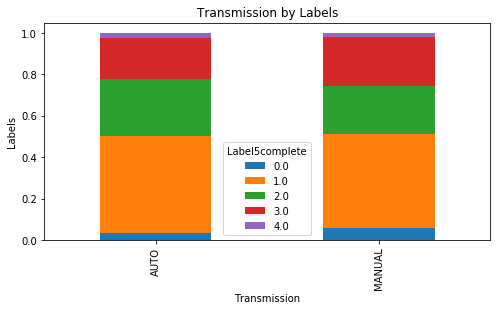




Absolute Crosstab: 
 Label5complete   0.0    1.0   2.0   3.0  4.0
WheelTypeID                                 
1.0              543  13321  8471  3874  796
2.0             1133  10217  5299  6173  492
3.0               19    265   145    90   12


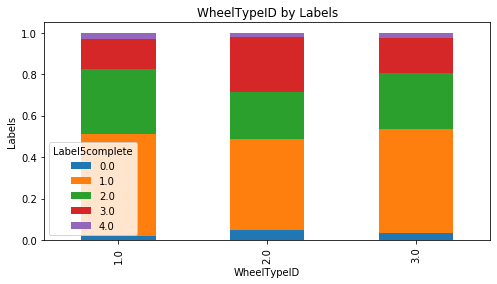




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0   3.0   4.0
Nationality                                   
AMERICAN        1172  19520  11814  8073  1172
NOT AMERICAN     523   4283   2101  2064   128


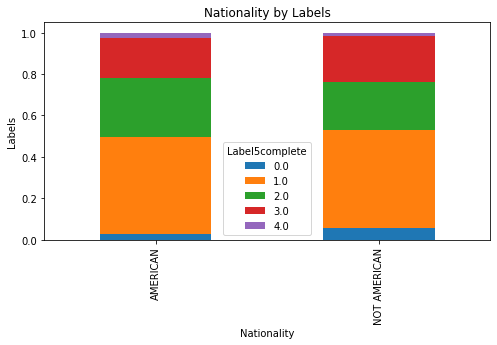




Absolute Crosstab: 
 Label5complete   0.0   1.0   2.0   3.0  4.0
Size                                       
COMPACT          291  2426  1251  1341  232
CROSSOVER         12   696   358   118    4
LARGE             49  3437  1950   624  124
LARGE SUV          4   461   427    44   20
LARGE TRUCK       24  1059   891   175   23
MEDIUM          1135  8859  4550  6400  634
MEDIUM SUV        66  2715  1837   549   70
SMALL SUV          6   795   634   105   31
SMALL TRUCK       14   289   235    88   19
SPECIALTY         15   858   268   233   11
SPORTS            15   312   171   107    8
VAN               64  1896  1343   353  124


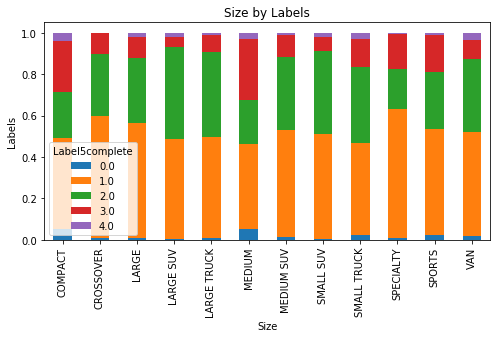




Absolute Crosstab: 
 Label5complete        0.0   1.0   2.0   3.0  4.0
TopThreeAmericanName                            
CHRYSLER              695  6495  3475  4693  270
FORD                   81  4010  3079   767  464
GM                    396  9015  5260  2613  438
OTHER                 523  4283  2101  2064  128


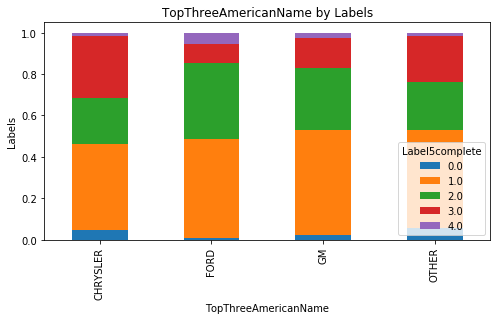




Absolute Crosstab: 
 Label5complete  0.0   1.0   2.0   3.0  4.0
VNST                                      
AL               17   245   144    53   12
AR                0    13    17     7    3
AZ              150  2066  1160   851  112
CA              136  2383  1375   986  147
CO               87  1657  1085   591  109
FL              236  3433  1986  1267  192
GA               55   903   467   293   53
IA               13   181    93    65    7
ID                1    55    31    24    4
IL                9   148    83    64    3
IN                8   162    86    57   11
KY                5    75    44    36    4
LA                6   107    83    39    5
MA                1     4     1     1    1
MD               23   352   213   129   20
MI                0     2     1     3    1
MN                2    23    14     5    0
MO               11   221   138    94    9
MS               10   152   105    77    7
NC              171  2353  1413   910  136
NE                0     8     

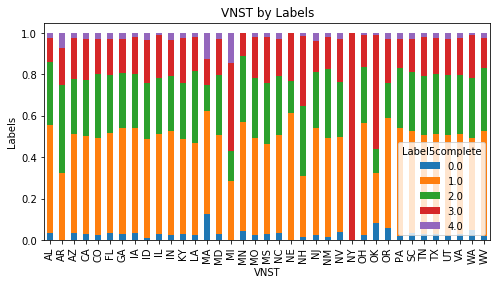




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0   3.0   4.0
IsOnlineSale                                  
0               1658  23154  13556  9915  1264
1                 37    649    359   222    36


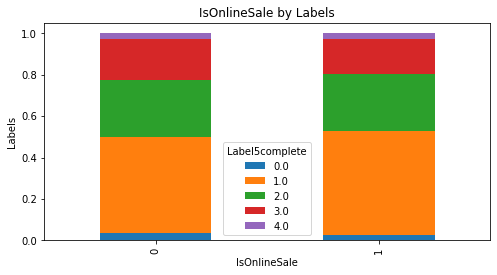




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0   3.0   4.0
Doors                                         
2D                96   1206    674   472    92
3D                 2     19     11     3     5
4D              1501  19367  10889  8986  1069
5D                 0     31     17    13     1


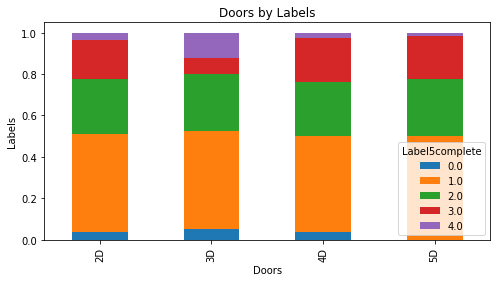




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0    3.0   4.0
Label4complete                                 
0.0                0      0  13915      0  1300
1.0                0  23803      0      0     0
2.0             1695      0      0      0     0
3.0                0      0      0  10137     0


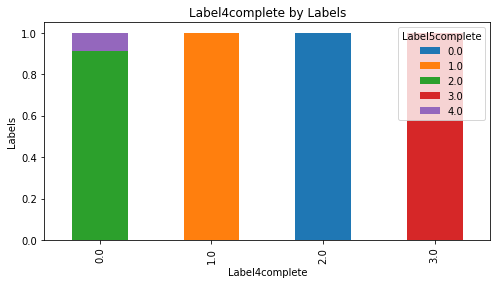




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0    3.0   4.0
Label3complete                                 
0.0                0  23803      0  10137     0
1.0                0      0  13915      0  1300
2.0             1695      0      0      0     0


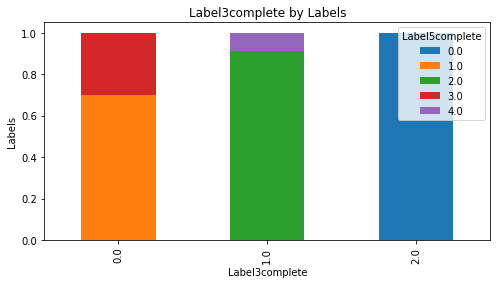




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0   3.0   4.0
Label5ward                                    
0.0                0   1563  13803     0  1300
1.0                0    905      0  7913     0
2.0                0  10906    112     0     0
3.0             1695      0      0  1890     0
4.0                0  10429      0   334     0


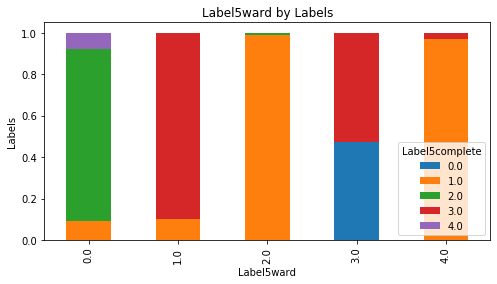




Absolute Crosstab: 
 Label5complete   0.0    1.0    2.0   3.0   4.0
Label6ward                                    
0.0                0    905      0  7913     0
1.0                0   1563  11499     0     0
2.0                0  10906    112     0     0
3.0             1695      0      0  1890     0
4.0                0  10429      0   334     0
5.0                0      0   2304     0  1300


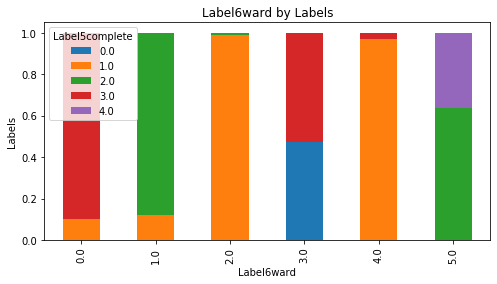

In [15]:
for col in df[categorical_columns]:
    
    absCrosstabClusters = pd.crosstab(df[col], df[Labels])
    relCrosstabClusters = absCrosstabClusters.div(absCrosstabClusters.sum(1).astype(float), axis=0)
    
    print('\n\n\nAbsolute Crosstab: \n', absCrosstabClusters)
    relCrosstabClusters.plot(kind='bar', stacked=True, title= col + ' by Labels', figsize=(8,4))
    plt.xlabel(col)
    plt.ylabel('Labels')
    plt.show()

** Visualizzazione dei Cluster in due dimensioni **

In [16]:
numerical_columns = ['VehOdo', 'VehBCost', 'MMRAcquisitionAuctionAveragePrice', 'VehicleAge', 'CostOverOdo', 'WarrantyCost']

In [17]:
from itertools import combinations as comb


 Scatter Plot VehOdo vs VehBCost


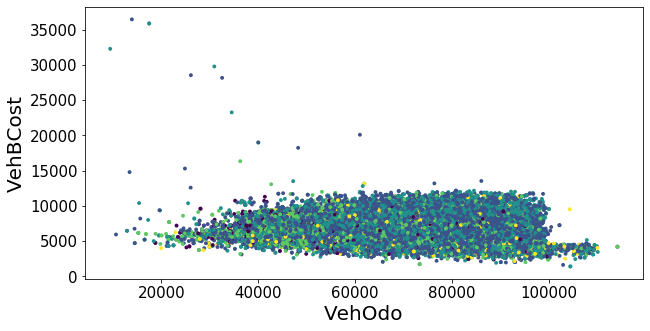


 Scatter Plot VehOdo vs MMRAcquisitionAuctionAveragePrice


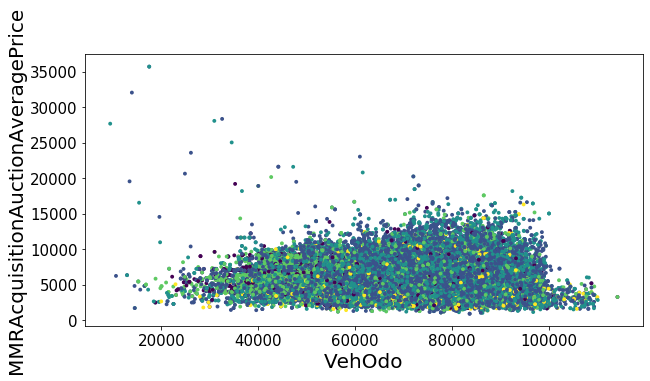


 Scatter Plot VehOdo vs VehicleAge


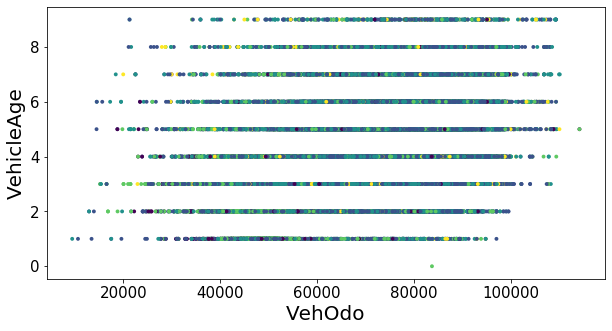


 Scatter Plot VehOdo vs CostOverOdo


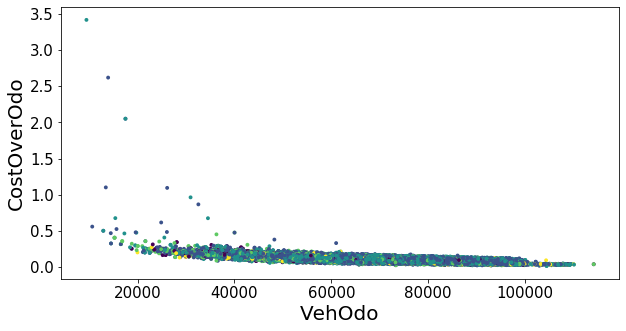


 Scatter Plot VehOdo vs WarrantyCost


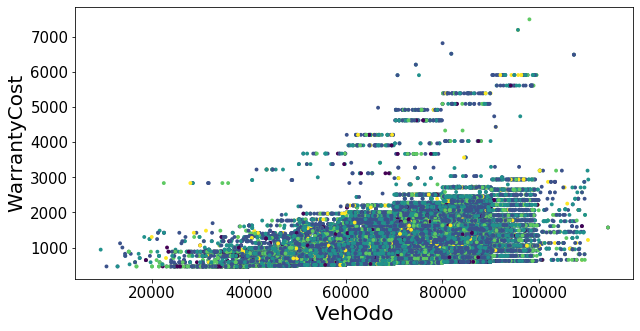


 Scatter Plot VehBCost vs MMRAcquisitionAuctionAveragePrice


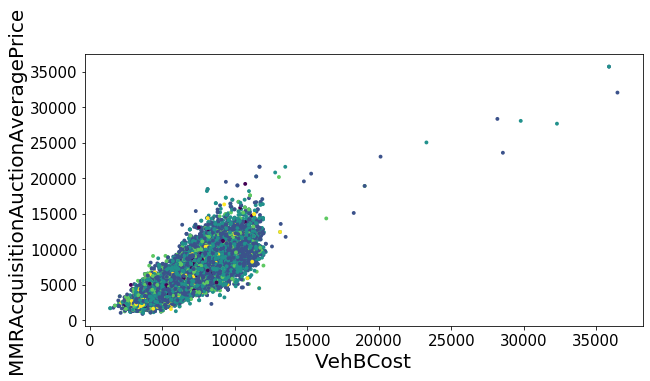


 Scatter Plot VehBCost vs VehicleAge


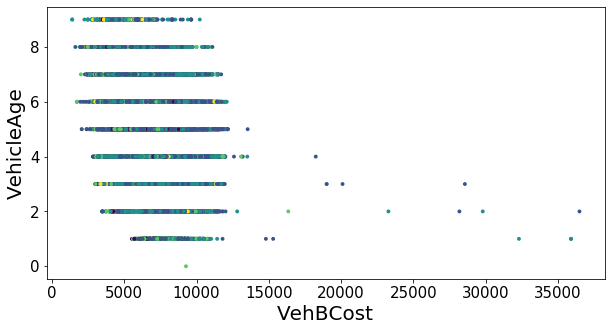


 Scatter Plot VehBCost vs CostOverOdo


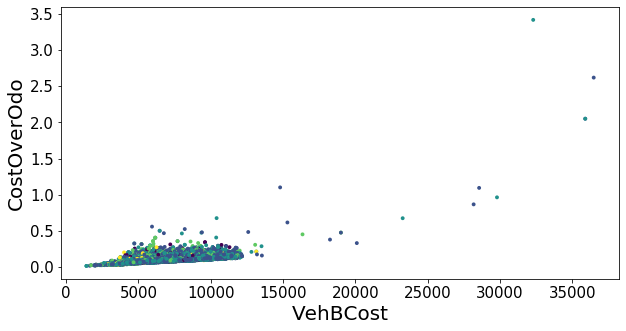


 Scatter Plot VehBCost vs WarrantyCost


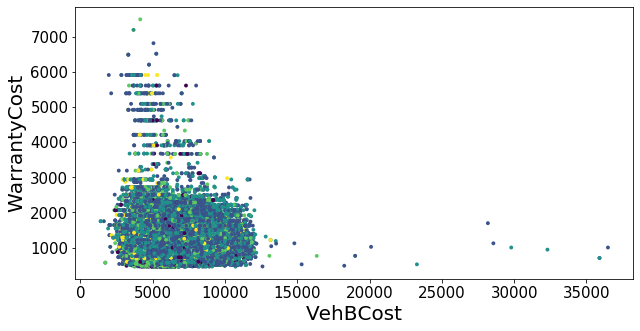


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs VehicleAge


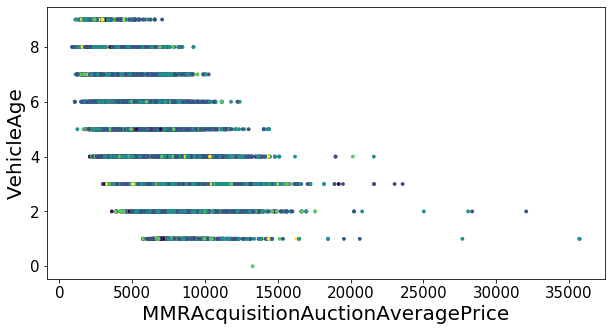


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs CostOverOdo


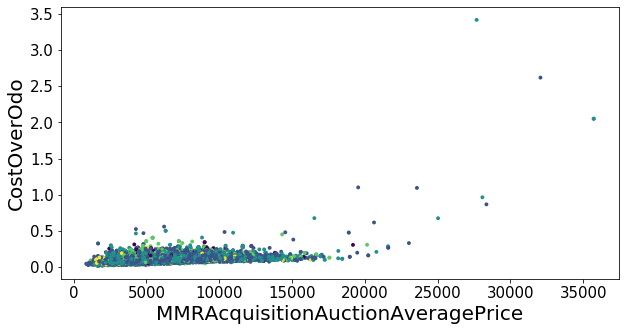


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs WarrantyCost


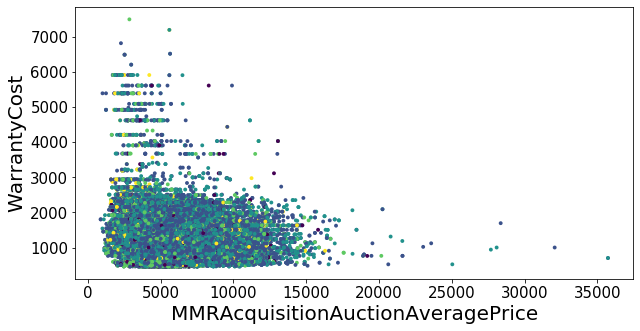


 Scatter Plot VehicleAge vs CostOverOdo


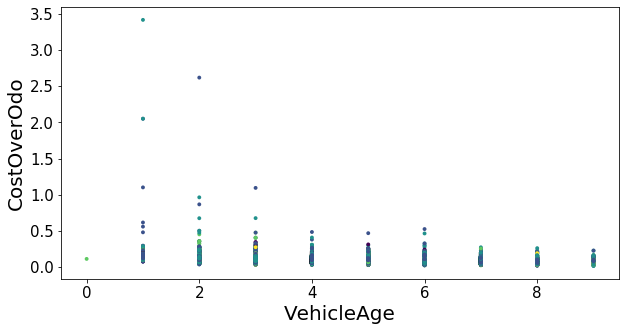


 Scatter Plot VehicleAge vs WarrantyCost


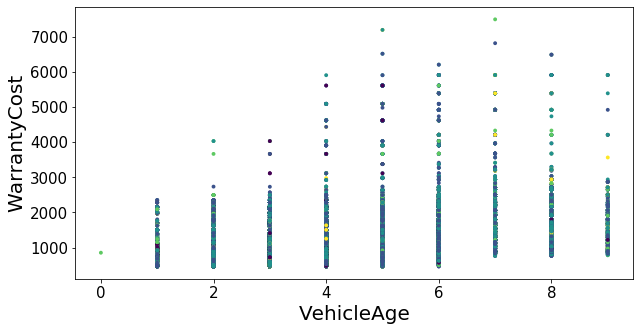


 Scatter Plot CostOverOdo vs WarrantyCost


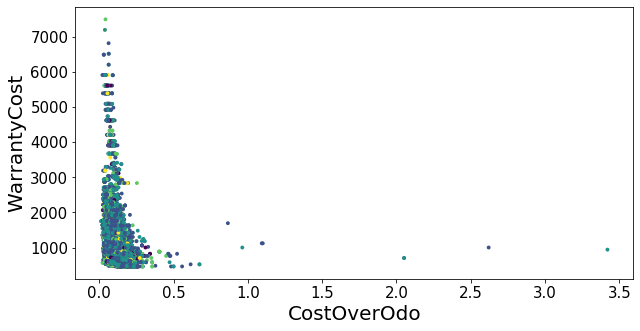

In [18]:
for col in list(comb(numerical_columns,2)):
    
    print('\n Scatter Plot ' + str(col[0]) + ' vs ' + str(col[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(df[col[0]], df[col[1]], c = df[Labels], s=15, edgecolor='')
    plt.xlabel(str(col[0]))
    plt.ylabel(str(col[1]))
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

In [19]:
Labels = df.columns[-4]
Labels

'Label4complete'




Absolute Crosstab: 
 Label4complete  0.0   1.0  2.0  3.0
PurchDate                          
2009-01         628   889   50  294
2009-02         694  1020   74  389
2009-03         679  1051   57  305
2009-04         801  1227   62  412
2009-05         675   914   62  417
2009-06         587   830   43  285
2009-07         666  1062   56  470
2009-08         716  1085   79  517
2009-09         693  1053   81  456
2009-10         772  1283   71  513
2009-11         523   836   58  376
2009-12         448   759   66  356
2010-01         631  1032   96  494
2010-02         614   978   83  536
2010-03         610   887   87  433
2010-04         585   955   65  462
2010-05         558   862   77  423
2010-06         626   966   83  469
2010-07         661  1148   72  400
2010-08         580   848   64  383
2010-09         665  1098   71  487
2010-10         679  1157   90  499
2010-11         619  1058   81  426
2010-12         505   805   67  335


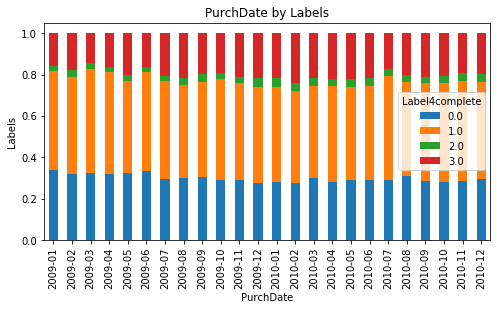




Absolute Crosstab: 
 Label4complete        0.0    1.0   2.0   3.0
SubModel                                    
ACCESS CAB              1      2     0     0
BASE                    0      0     0     1
CARGO                   0      1     0     0
CARGO EXT               2      0     0     0
CONVERTIBLE            75    169    22    92
CONVERTIBLE HARDTOP     0      2     0     0
CONVERTIBLE SUV         1      1     0     0
COUPE                 617    899    59   327
COUPE QUAD             28     55     5    22
CREW CAB              153    156     1    15
CROSSOVER              15     21     3     4
CUV                   468    626    17   123
DOUBLE CAB              7      5     0     0
EXT CAB               376    432    13    77
HARDTOP                 0      2     0     2
HATCHBACK              55     88    11    31
JEEP                    3      2     0     1
LIFTBACK                1      4     0     1
MAZDA3                  8      8     0     1
MAZDA5                  0      

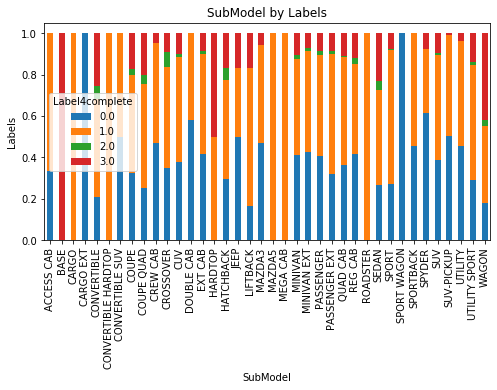




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0   3.0
IsBadBuy                                
0               13072  20907  1501  8968
1                2143   2896   194  1169


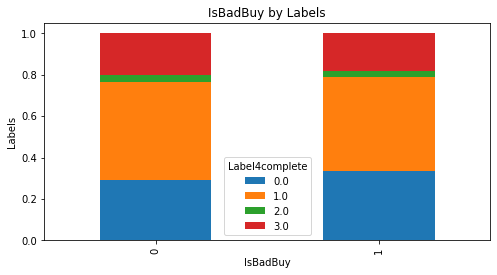




Absolute Crosstab: 
 Label4complete   0.0    1.0  2.0   3.0
Auction                               
ADESA           3179   4883  317  1789
MANHEIM         8809  13709  808  4907
OTHER           3227   5211  570  3441


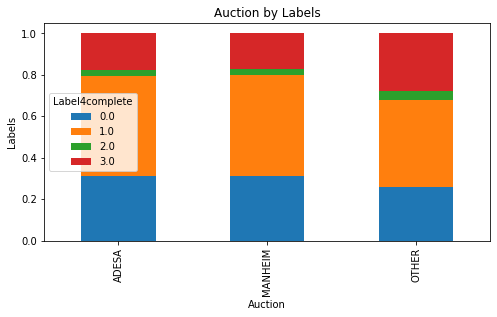




Absolute Crosstab: 
 Label4complete   0.0   1.0  2.0   3.0
VehicleAge                           
0                  0     0    0     1
1                293   579  245  1214
2               1184  2613  321  2007
3               2703  5590  381  2231
4               3345  5720  329  2151
5               3026  4302  216  1263
6               2224  2665  107   645
7               1497  1458   53   404
8                708   690   37   172
9                235   186    6    49


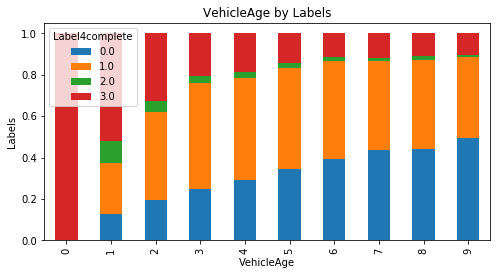




Absolute Crosstab: 
 Label4complete   0.0   1.0  2.0   3.0
Make                                 
ACURA              6    14    1     4
BUICK            211   270   12    56
CADILLAC           7    14    0     4
CHEVROLET       3894  6100  280  1714
CHRYSLER        1391  2610  368  1974
DODGE           1979  3280  320  2626
FORD            3190  3669   72   704
GMC              172   220    1    20
HONDA            152   177    3    44
HUMMER             0     1    0     0
HYUNDAI          276   689   60   369
INFINITI          12    14    2     8
ISUZU             20    61    2    20
JEEP             377   604    7    93
KIA              239   758  172   682
LEXUS             14    12    0     1
LINCOLN           21    33    4     9
MAZDA            228   410    6   103
MERCURY          332   308    5    54
MINI               6    10    1     0
MITSUBISHI       193   408   21   164
NISSAN           605   849    8   129
OLDSMOBILE        66    99    3    19
PLYMOUTH           0     1

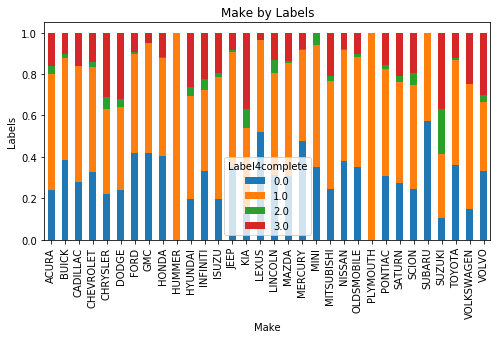




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0   3.0
Transmission                            
AUTO            14729  22937  1587  9690
MANUAL            486    866   108   447


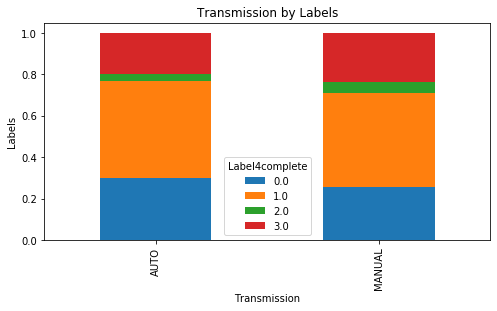




Absolute Crosstab: 
 Label4complete   0.0    1.0   2.0   3.0
WheelTypeID                            
1.0             9267  13321   543  3874
2.0             5791  10217  1133  6173
3.0              157    265    19    90


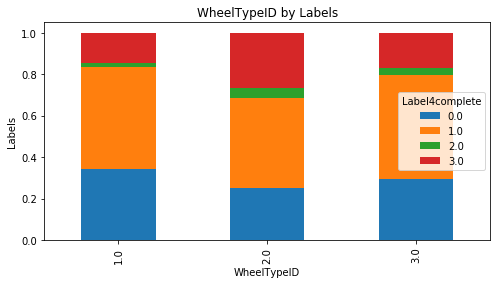




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0   3.0
Nationality                             
AMERICAN        12986  19520  1172  8073
NOT AMERICAN     2229   4283   523  2064


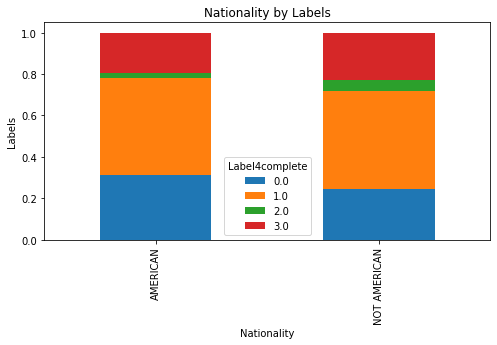




Absolute Crosstab: 
 Label4complete   0.0   1.0   2.0   3.0
Size                                  
COMPACT         1483  2426   291  1341
CROSSOVER        362   696    12   118
LARGE           2074  3437    49   624
LARGE SUV        447   461     4    44
LARGE TRUCK      914  1059    24   175
MEDIUM          5184  8859  1135  6400
MEDIUM SUV      1907  2715    66   549
SMALL SUV        665   795     6   105
SMALL TRUCK      254   289    14    88
SPECIALTY        279   858    15   233
SPORTS           179   312    15   107
VAN             1467  1896    64   353


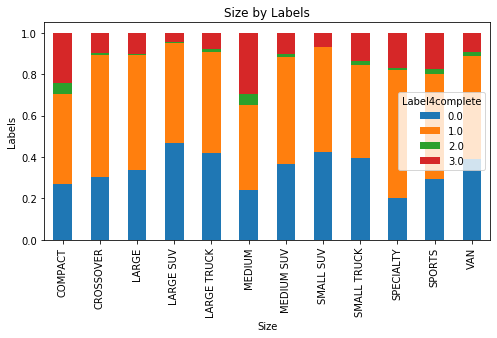




Absolute Crosstab: 
 Label4complete         0.0   1.0  2.0   3.0
TopThreeAmericanName                       
CHRYSLER              3745  6495  695  4693
FORD                  3543  4010   81   767
GM                    5698  9015  396  2613
OTHER                 2229  4283  523  2064


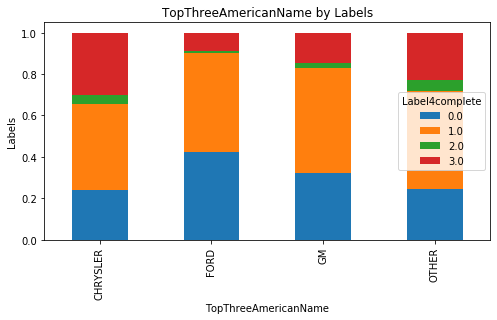




Absolute Crosstab: 
 Label4complete   0.0   1.0  2.0   3.0
VNST                                 
AL               156   245   17    53
AR                20    13    0     7
AZ              1272  2066  150   851
CA              1522  2383  136   986
CO              1194  1657   87   591
FL              2178  3433  236  1267
GA               520   903   55   293
IA               100   181   13    65
ID                35    55    1    24
IL                86   148    9    64
IN                97   162    8    57
KY                48    75    5    36
LA                88   107    6    39
MA                 2     4    1     1
MD               233   352   23   129
MI                 2     2    0     3
MN                14    23    2     5
MO               147   221   11    94
MS               112   152   10    77
NC              1549  2353  171   910
NE                 2     8    0     3
NH                27    23    1    26
NJ                67   113    5    33
NM                70    94

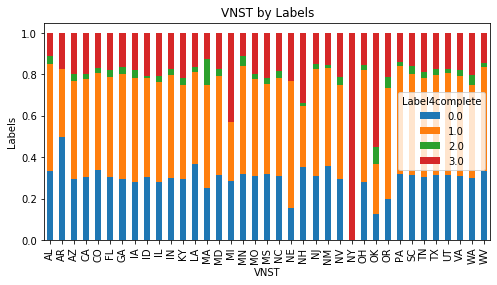




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0   3.0
IsOnlineSale                            
0               14820  23154  1658  9915
1                 395    649    37   222


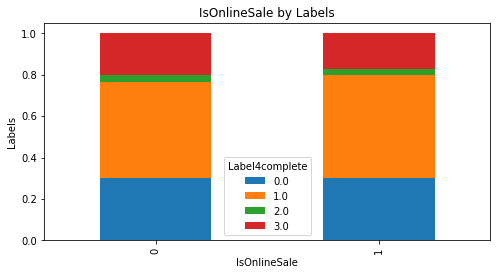




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0   3.0
Doors                                   
2D                766   1206    96   472
3D                 16     19     2     3
4D              11958  19367  1501  8986
5D                 18     31     0    13


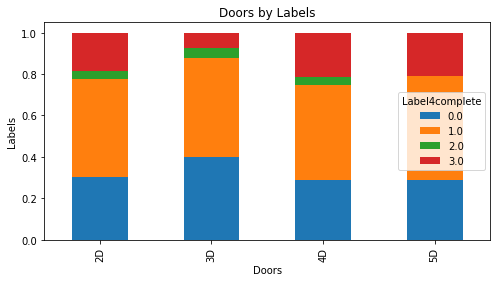




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0    3.0
Label4complete                           
0.0             15215      0     0      0
1.0                 0  23803     0      0
2.0                 0      0  1695      0
3.0                 0      0     0  10137


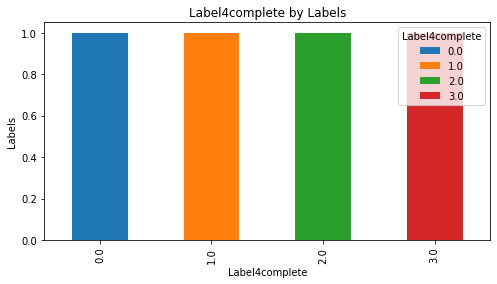




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0    3.0
Label3complete                           
0.0                 0  23803     0  10137
1.0             15215      0     0      0
2.0                 0      0  1695      0


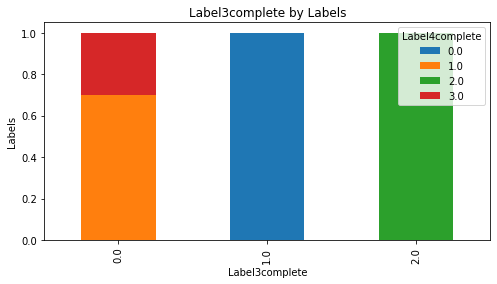




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0   3.0
Label5ward                              
0.0             15103   1563     0     0
1.0                 0    905     0  7913
2.0               112  10906     0     0
3.0                 0      0  1695  1890
4.0                 0  10429     0   334


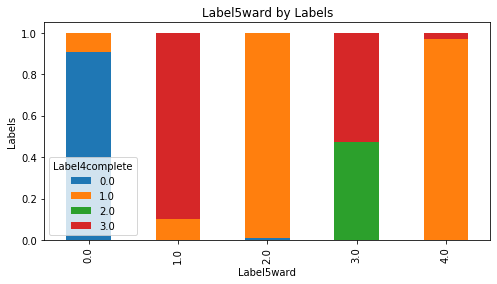




Absolute Crosstab: 
 Label4complete    0.0    1.0   2.0   3.0
Label6ward                              
0.0                 0    905     0  7913
1.0             11499   1563     0     0
2.0               112  10906     0     0
3.0                 0      0  1695  1890
4.0                 0  10429     0   334
5.0              3604      0     0     0


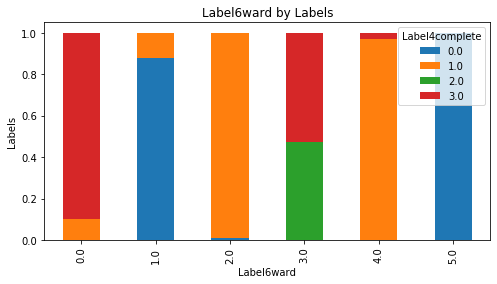

In [20]:
for col in df[categorical_columns]:
    
    absCrosstabClusters = pd.crosstab(df[col], df[Labels])
    relCrosstabClusters = absCrosstabClusters.div(absCrosstabClusters.sum(1).astype(float), axis=0)
    
    print('\n\n\nAbsolute Crosstab: \n', absCrosstabClusters)
    relCrosstabClusters.plot(kind='bar', stacked=True, title= col + ' by Labels', figsize=(8,4))
    plt.xlabel(col)
    plt.ylabel('Labels')
    plt.show()

In [21]:
from itertools import combinations as comb


 Scatter Plot VehOdo vs VehBCost


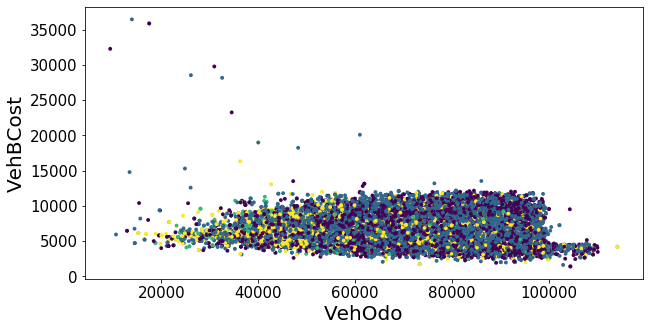


 Scatter Plot VehOdo vs MMRAcquisitionAuctionAveragePrice


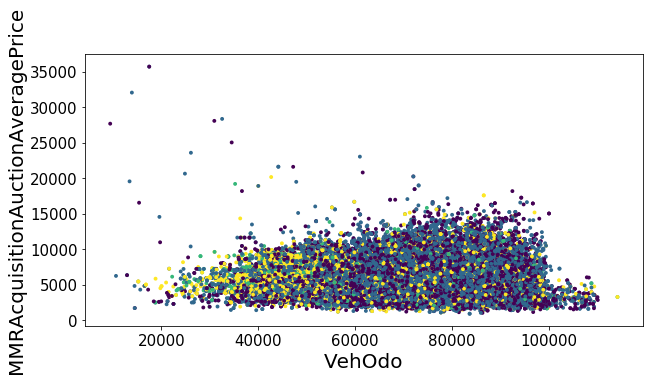


 Scatter Plot VehOdo vs VehicleAge


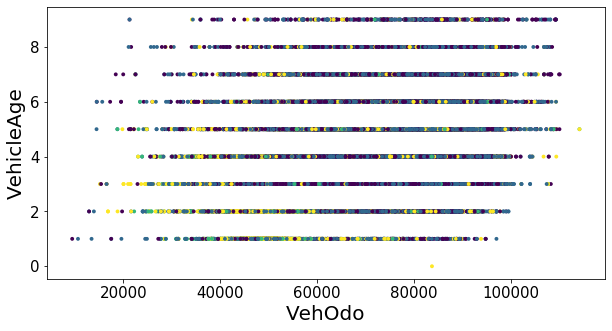


 Scatter Plot VehOdo vs CostOverOdo


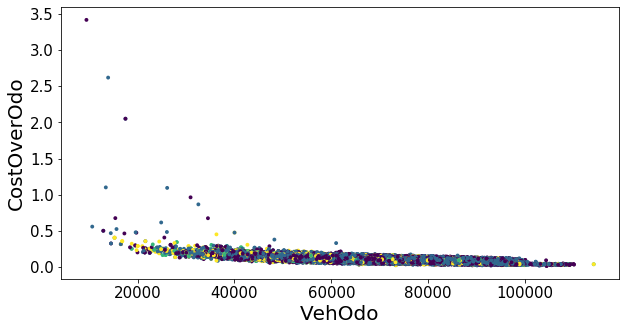


 Scatter Plot VehOdo vs WarrantyCost


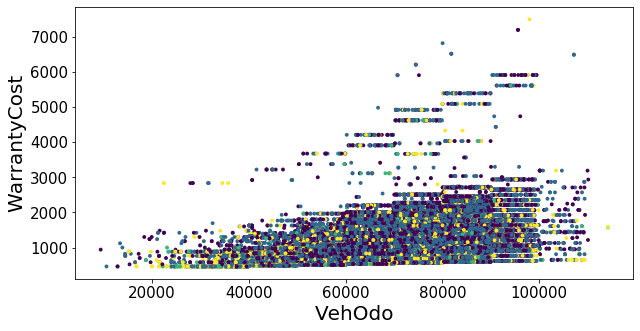


 Scatter Plot VehBCost vs MMRAcquisitionAuctionAveragePrice


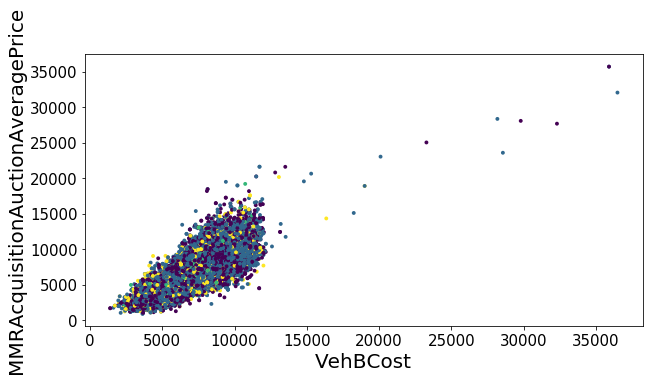


 Scatter Plot VehBCost vs VehicleAge


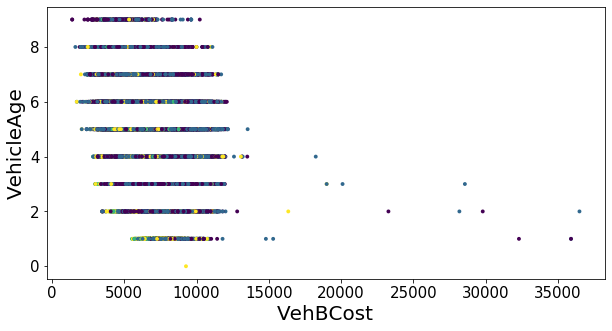


 Scatter Plot VehBCost vs CostOverOdo


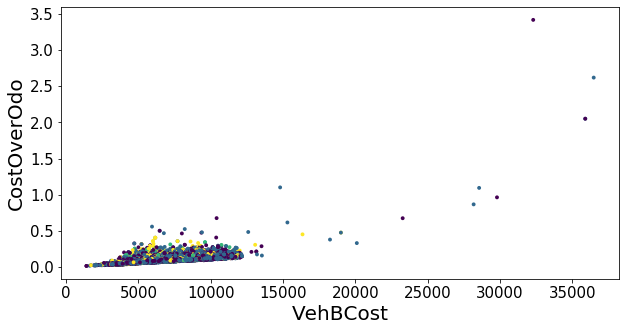


 Scatter Plot VehBCost vs WarrantyCost


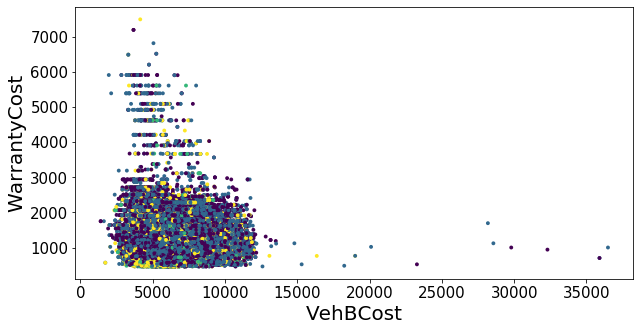


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs VehicleAge


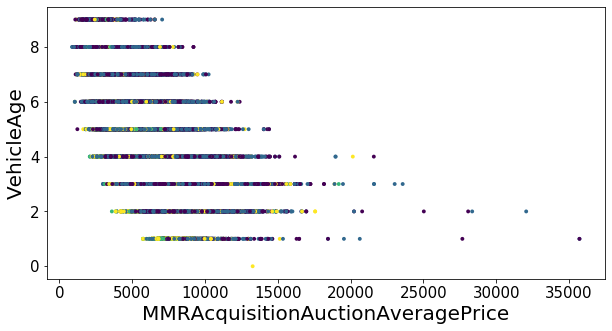


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs CostOverOdo


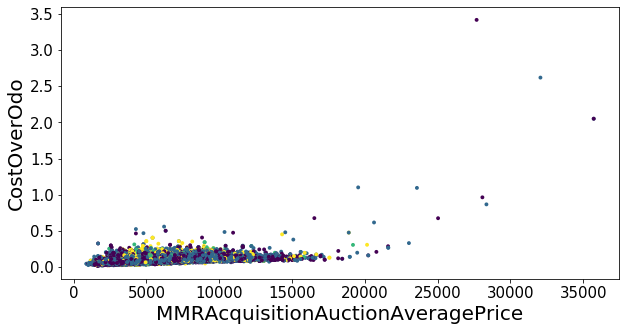


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs WarrantyCost


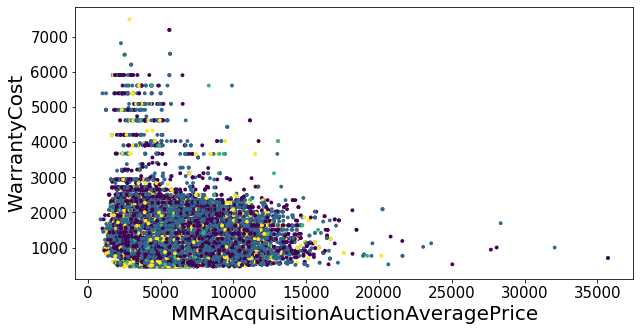


 Scatter Plot VehicleAge vs CostOverOdo


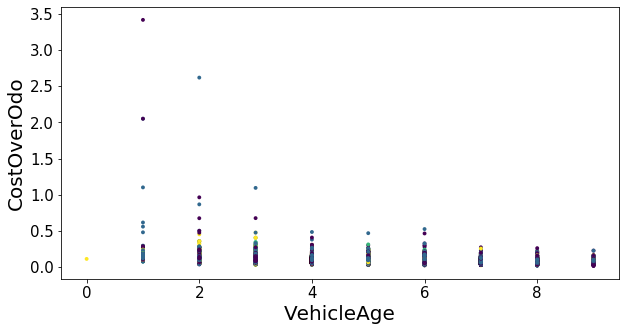


 Scatter Plot VehicleAge vs WarrantyCost


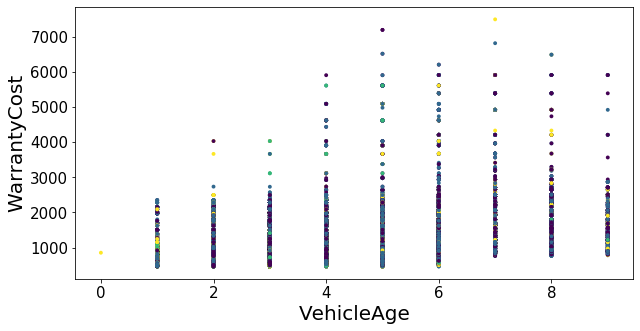


 Scatter Plot CostOverOdo vs WarrantyCost


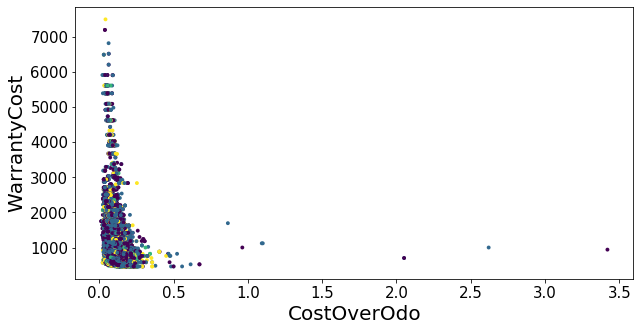

In [22]:
for col in list(comb(numerical_columns,2)):
    
    print('\n Scatter Plot ' + str(col[0]) + ' vs ' + str(col[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(df[col[0]], df[col[1]], c = df[Labels], s=15, edgecolor='')
    plt.xlabel(str(col[0]))
    plt.ylabel(str(col[1]))
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

In [23]:
Labels = df.columns[-3]
Labels

'Label3complete'




Absolute Crosstab: 
 Label3complete   0.0  1.0  2.0
PurchDate                     
2009-01         1183  628   50
2009-02         1409  694   74
2009-03         1356  679   57
2009-04         1639  801   62
2009-05         1331  675   62
2009-06         1115  587   43
2009-07         1532  666   56
2009-08         1602  716   79
2009-09         1509  693   81
2009-10         1796  772   71
2009-11         1212  523   58
2009-12         1115  448   66
2010-01         1526  631   96
2010-02         1514  614   83
2010-03         1320  610   87
2010-04         1417  585   65
2010-05         1285  558   77
2010-06         1435  626   83
2010-07         1548  661   72
2010-08         1231  580   64
2010-09         1585  665   71
2010-10         1656  679   90
2010-11         1484  619   81
2010-12         1140  505   67


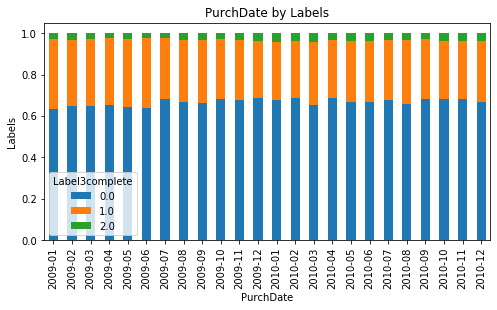




Absolute Crosstab: 
 Label3complete         0.0   1.0   2.0
SubModel                              
ACCESS CAB               2     1     0
BASE                     1     0     0
CARGO                    1     0     0
CARGO EXT                0     2     0
CONVERTIBLE            261    75    22
CONVERTIBLE HARDTOP      2     0     0
CONVERTIBLE SUV          1     1     0
COUPE                 1226   617    59
COUPE QUAD              77    28     5
CREW CAB               171   153     1
CROSSOVER               25    15     3
CUV                    749   468    17
DOUBLE CAB               5     7     0
EXT CAB                509   376    13
HARDTOP                  4     0     0
HATCHBACK              119    55    11
JEEP                     3     3     0
LIFTBACK                 5     1     0
MAZDA3                   9     8     0
MAZDA5                   5     0     0
MEGA CAB                 3     0     0
MINIVAN               1041   748    31
MINIVAN EXT             96    73     3
P

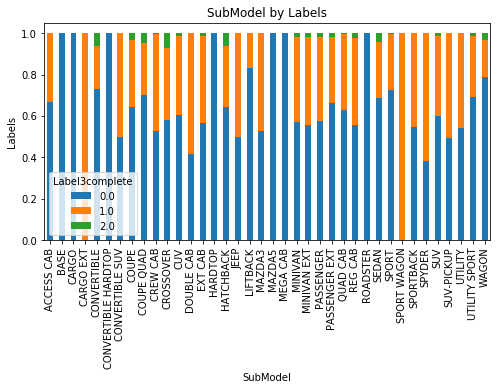




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
IsBadBuy                          
0               29875  13072  1501
1                4065   2143   194


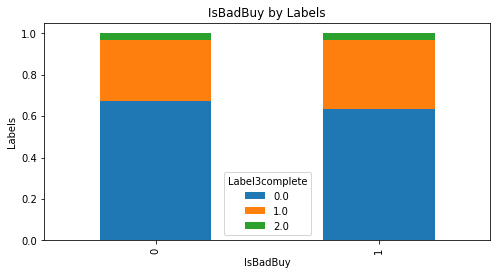




Absolute Crosstab: 
 Label3complete    0.0   1.0  2.0
Auction                         
ADESA            6672  3179  317
MANHEIM         18616  8809  808
OTHER            8652  3227  570


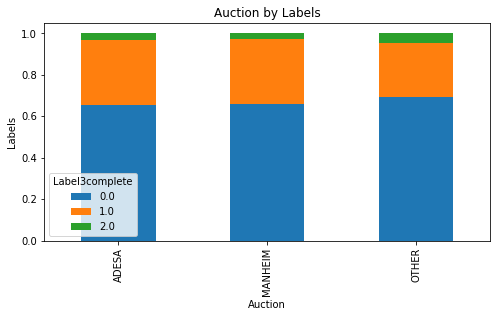




Absolute Crosstab: 
 Label3complete   0.0   1.0  2.0
VehicleAge                     
0                  1     0    0
1               1793   293  245
2               4620  1184  321
3               7821  2703  381
4               7871  3345  329
5               5565  3026  216
6               3310  2224  107
7               1862  1497   53
8                862   708   37
9                235   235    6


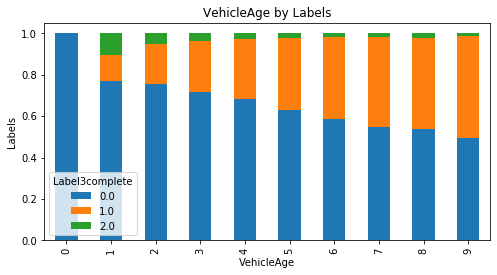




Absolute Crosstab: 
 Label3complete   0.0   1.0  2.0
Make                           
ACURA             18     6    1
BUICK            326   211   12
CADILLAC          18     7    0
CHEVROLET       7814  3894  280
CHRYSLER        4584  1391  368
DODGE           5906  1979  320
FORD            4373  3190   72
GMC              240   172    1
HONDA            221   152    3
HUMMER             1     0    0
HYUNDAI         1058   276   60
INFINITI          22    12    2
ISUZU             81    20    2
JEEP             697   377    7
KIA             1440   239  172
LEXUS             13    14    0
LINCOLN           42    21    4
MAZDA            513   228    6
MERCURY          362   332    5
MINI              10     6    1
MITSUBISHI       572   193   21
NISSAN           978   605    8
OLDSMOBILE       118    66    3
PLYMOUTH           1     0    0
PONTIAC         2001   905   51
SATURN          1110   441   49
SCION             72    25    6
SUBARU             9    12    0
SUZUKI          

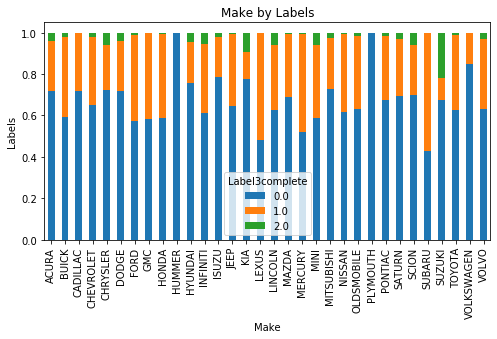




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
Transmission                      
AUTO            32627  14729  1587
MANUAL           1313    486   108


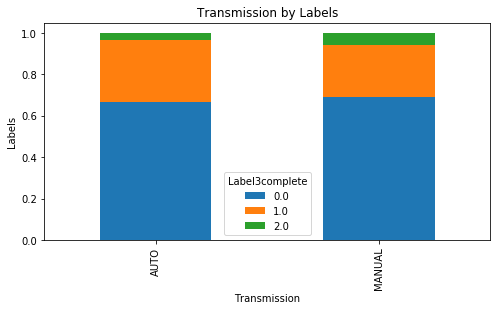




Absolute Crosstab: 
 Label3complete    0.0   1.0   2.0
WheelTypeID                      
1.0             17195  9267   543
2.0             16390  5791  1133
3.0               355   157    19


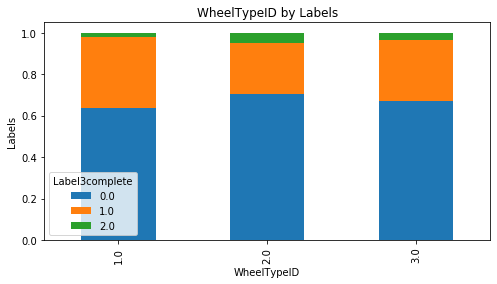




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
Nationality                       
AMERICAN        27593  12986  1172
NOT AMERICAN     6347   2229   523


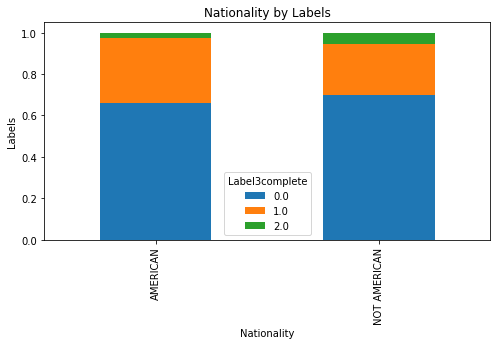




Absolute Crosstab: 
 Label3complete    0.0   1.0   2.0
Size                             
COMPACT          3767  1483   291
CROSSOVER         814   362    12
LARGE            4061  2074    49
LARGE SUV         505   447     4
LARGE TRUCK      1234   914    24
MEDIUM          15259  5184  1135
MEDIUM SUV       3264  1907    66
SMALL SUV         900   665     6
SMALL TRUCK       377   254    14
SPECIALTY        1091   279    15
SPORTS            419   179    15
VAN              2249  1467    64


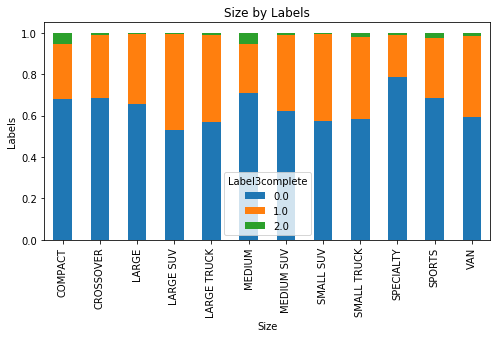




Absolute Crosstab: 
 Label3complete          0.0   1.0  2.0
TopThreeAmericanName                  
CHRYSLER              11188  3745  695
FORD                   4777  3543   81
GM                    11628  5698  396
OTHER                  6347  2229  523


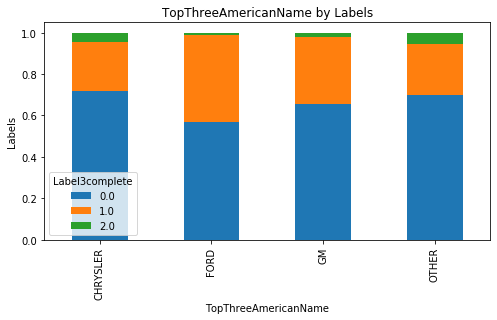




Absolute Crosstab: 
 Label3complete   0.0   1.0  2.0
VNST                           
AL               298   156   17
AR                20    20    0
AZ              2917  1272  150
CA              3369  1522  136
CO              2248  1194   87
FL              4700  2178  236
GA              1196   520   55
IA               246   100   13
ID                79    35    1
IL               212    86    9
IN               219    97    8
KY               111    48    5
LA               146    88    6
MA                 5     2    1
MD               481   233   23
MI                 5     2    0
MN                28    14    2
MO               315   147   11
MS               229   112   10
NC              3263  1549  171
NE                11     2    0
NH                49    27    1
NJ               146    67    5
NM               124    70    3
NV               263   115   15
NY                 3     0    0
OH               374   150   12
OK              2181   346  229
OR              

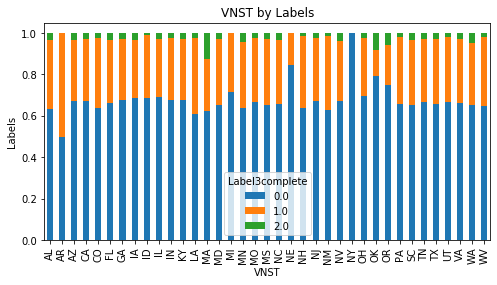




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
IsOnlineSale                      
0               33069  14820  1658
1                 871    395    37


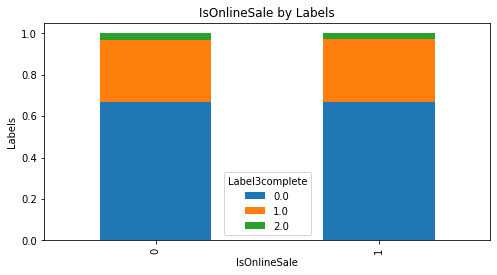




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
Doors                             
2D               1678    766    96
3D                 22     16     2
4D              28353  11958  1501
5D                 44     18     0


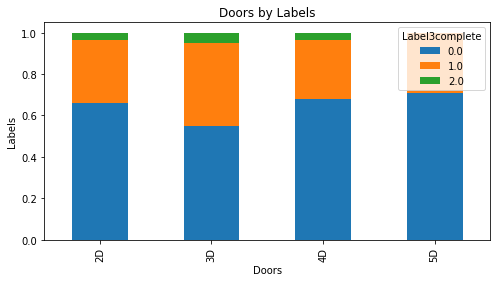




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
Label4complete                    
0.0                 0  15215     0
1.0             23803      0     0
2.0                 0      0  1695
3.0             10137      0     0


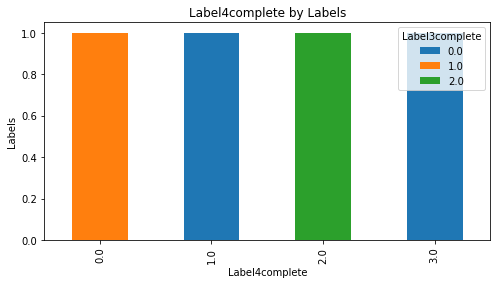




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
Label3complete                    
0.0             33940      0     0
1.0                 0  15215     0
2.0                 0      0  1695


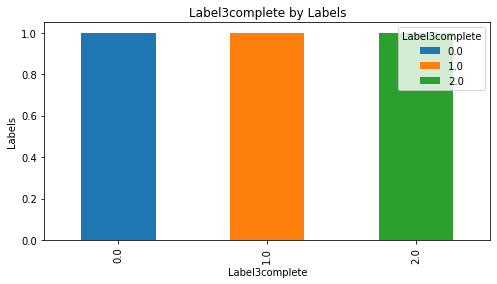




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
Label5ward                        
0.0              1563  15103     0
1.0              8818      0     0
2.0             10906    112     0
3.0              1890      0  1695
4.0             10763      0     0


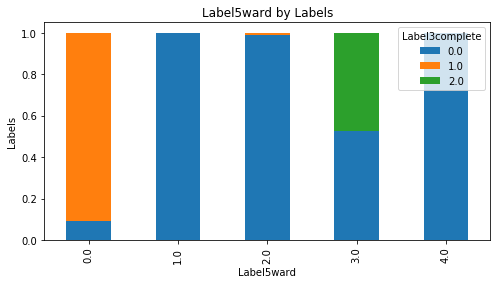




Absolute Crosstab: 
 Label3complete    0.0    1.0   2.0
Label6ward                        
0.0              8818      0     0
1.0              1563  11499     0
2.0             10906    112     0
3.0              1890      0  1695
4.0             10763      0     0
5.0                 0   3604     0


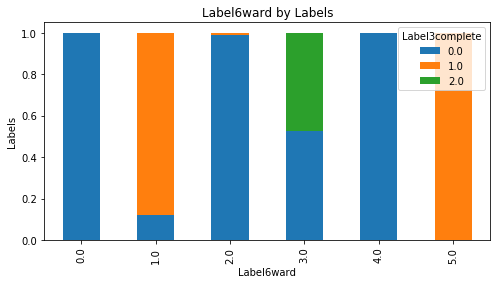

In [24]:
for col in df[categorical_columns]:
    
    absCrosstabClusters = pd.crosstab(df[col], df[Labels])
    relCrosstabClusters = absCrosstabClusters.div(absCrosstabClusters.sum(1).astype(float), axis=0)
    
    print('\n\n\nAbsolute Crosstab: \n', absCrosstabClusters)
    relCrosstabClusters.plot(kind='bar', stacked=True, title= col + ' by Labels', figsize=(8,4))
    plt.xlabel(col)
    plt.ylabel('Labels')
    plt.show()

In [21]:
from itertools import combinations as comb


 Scatter Plot VehOdo vs VehBCost


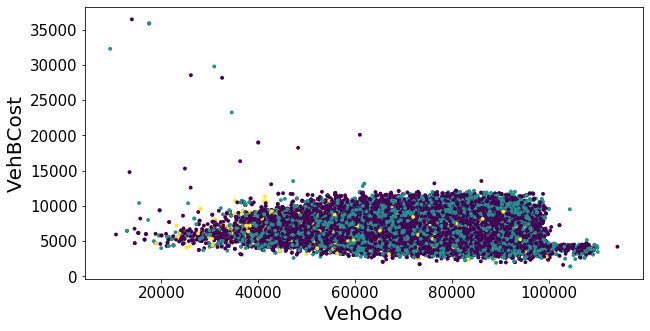


 Scatter Plot VehOdo vs MMRAcquisitionAuctionAveragePrice


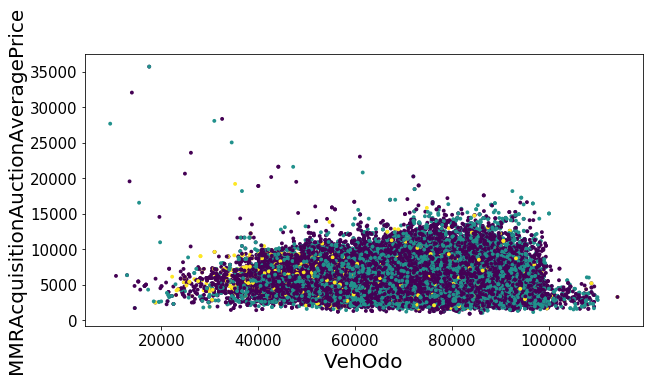


 Scatter Plot VehOdo vs VehicleAge


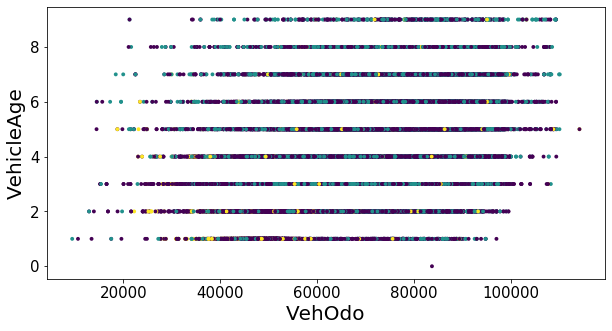


 Scatter Plot VehOdo vs CostOverOdo


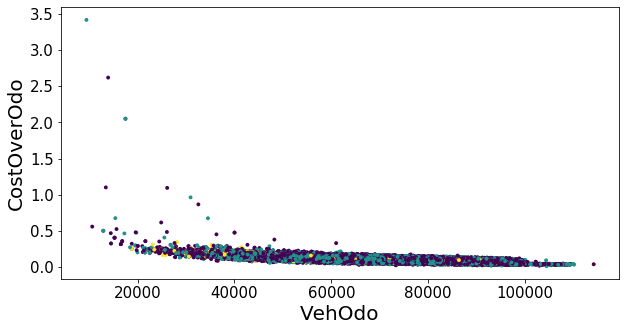


 Scatter Plot VehOdo vs WarrantyCost


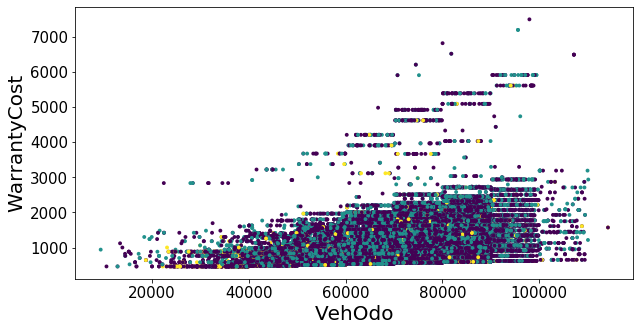


 Scatter Plot VehBCost vs MMRAcquisitionAuctionAveragePrice


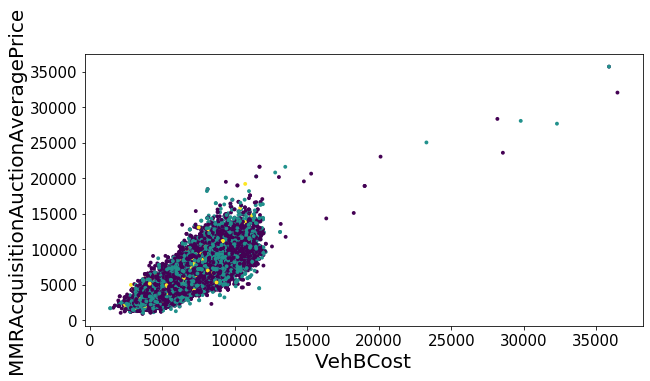


 Scatter Plot VehBCost vs VehicleAge


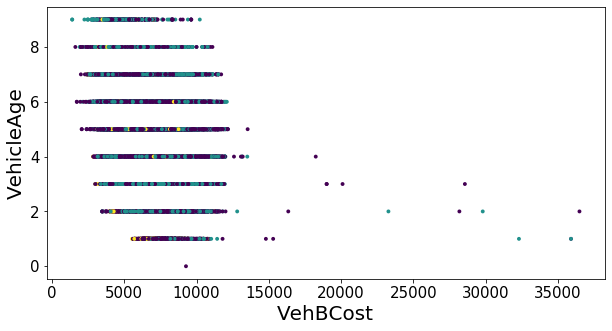


 Scatter Plot VehBCost vs CostOverOdo


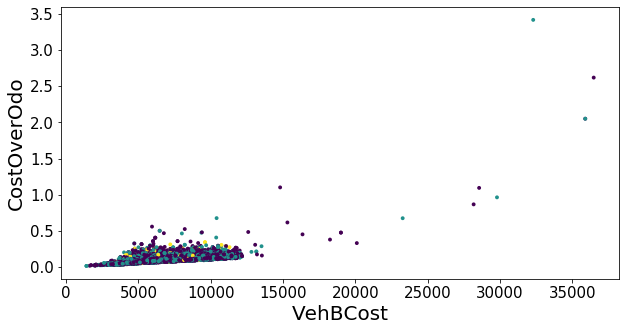


 Scatter Plot VehBCost vs WarrantyCost


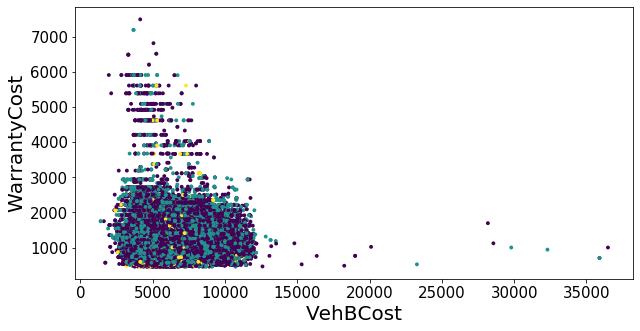


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs VehicleAge


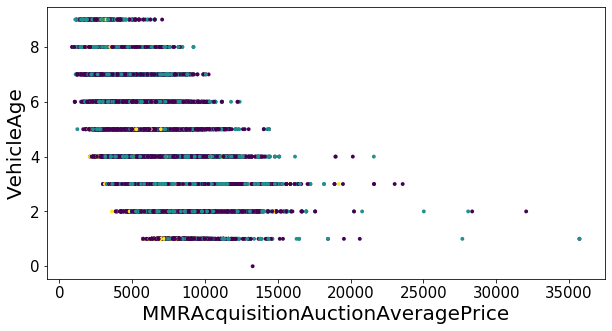


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs CostOverOdo


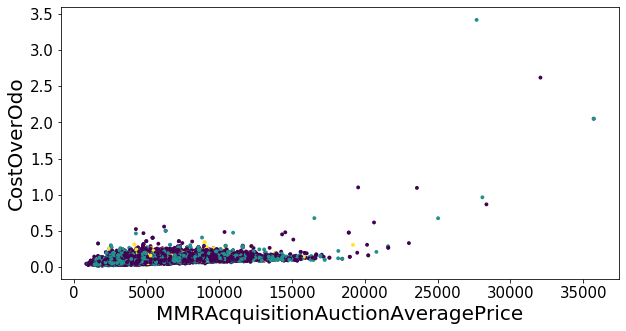


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs WarrantyCost


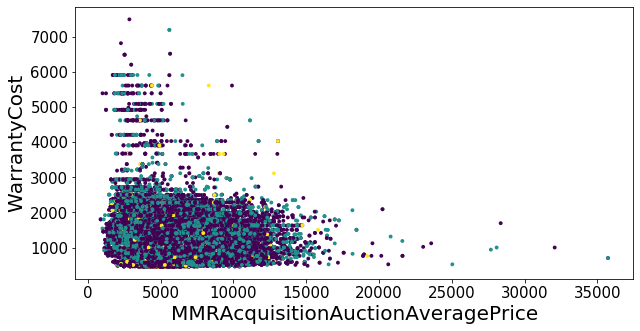


 Scatter Plot VehicleAge vs CostOverOdo


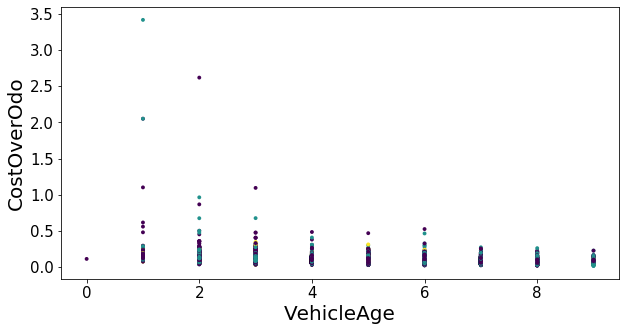


 Scatter Plot VehicleAge vs WarrantyCost


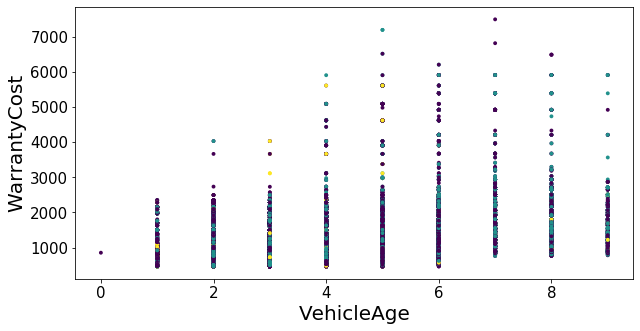


 Scatter Plot CostOverOdo vs WarrantyCost


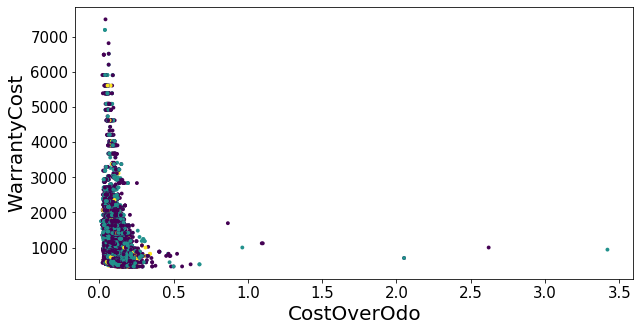

In [25]:
for col in list(comb(numerical_columns,2)):
    
    print('\n Scatter Plot ' + str(col[0]) + ' vs ' + str(col[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(df[col[0]], df[col[1]], c = df[Labels], s=15, edgecolor='')
    plt.xlabel(str(col[0]))
    plt.ylabel(str(col[1]))
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

In [26]:
Labels = df.columns[-2]
Labels

'Label5ward'




Absolute Crosstab: 
 Label5ward  0.0  1.0  2.0  3.0  4.0
PurchDate                          
2009-01     686  267  423   85  400
2009-02     748  343  521  133  432
2009-03     748  288  463   86  507
2009-04     881  378  586  119  538
2009-05     723  374  434  131  406
2009-06     639  258  397   88  363
2009-07     728  433  494  130  469
2009-08     791  432  510  186  478
2009-09     750  405  460  164  504
2009-10     847  454  588  154  596
2009-11     580  334  377  124  378
2009-12     496  296  332  136  369
2010-01     696  415  461  209  472
2010-02     673  441  457  198  442
2010-03     653  359  404  180  421
2010-04     647  388  448  163  421
2010-05     600  346  398  178  398
2010-06     681  404  439  180  440
2010-07     731  348  519  148  535
2010-08     637  340  368  133  397
2010-09     740  410  521  184  466
2010-10     763  412  538  199  513
2010-11     678  383  496  155  472
2010-12     550  310  384  122  346


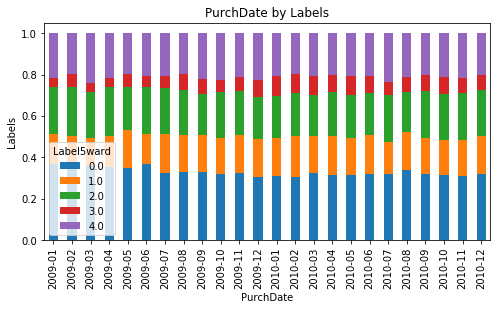




Absolute Crosstab: 
 Label5ward            0.0   1.0   2.0   3.0   4.0
SubModel                                         
ACCESS CAB              1     0     1     0     1
BASE                    0     1     0     0     0
CARGO                   0     0     1     0     0
CARGO EXT               2     0     0     0     0
CONVERTIBLE            84    87    67    34    86
CONVERTIBLE HARDTOP     0     0     2     0     0
CONVERTIBLE SUV         1     0     1     0     0
COUPE                 650   282   414   107   449
COUPE QUAD             29    21    30     5    25
CREW CAB              172    19    84     3    47
CROSSOVER              15     4    16     4     4
CUV                   519   132   310    30   243
DOUBLE CAB              7     0     3     0     2
EXT CAB               416    91   198    19   174
HARDTOP                 0     1     2     1     0
HATCHBACK              61    26    50    15    33
JEEP                    3     0     1     1     1
LIFTBACK                1 

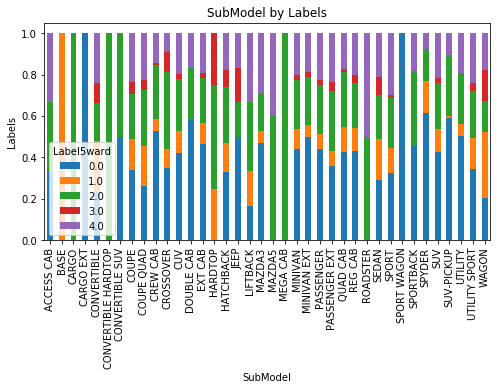




Absolute Crosstab: 
 Label5ward    0.0   1.0   2.0   3.0   4.0
IsBadBuy                                 
0           14371  7778  9608  3228  9463
1            2295  1040  1410   357  1300


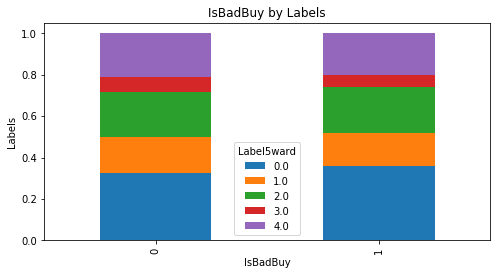




Absolute Crosstab: 
 Label5ward   0.0   1.0   2.0   3.0   4.0
Auction                                 
ADESA       3462  1639  2291   582  2194
MANHEIM     9686  4446  6393  1574  6134
OTHER       3518  2733  2334  1429  2435


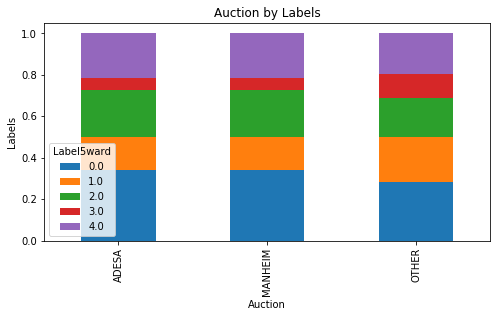




Absolute Crosstab: 
 Label5ward   0.0   1.0   2.0  3.0   4.0
VehicleAge                             
0              0     1     0    0     0
1            327   813   254  672   265
2           1366  1532  1173  906  1148
3           3014  2075  2387  745  2684
4           3640  2007  2549  573  2776
5           3312  1214  2039  354  1888
6           2412   609  1348  180  1092
7           1612   373   786   88   553
8            741   145   381   60   280
9            242    49   101    7    77


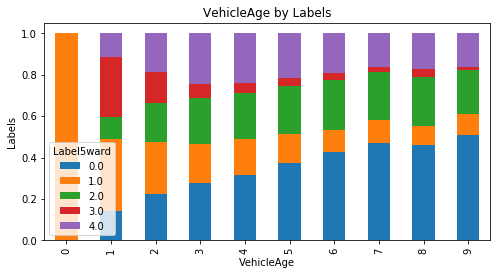




Absolute Crosstab: 
 Label5ward   0.0   1.0   2.0  3.0   4.0
Make                                   
ACURA         10     3     8    2     2
BUICK        227    63   153   17    89
CADILLAC       8     4     7    0     6
CHEVROLET   4272  1587  2746  565  2818
CHRYSLER    1515  1565  1143  813  1307
DODGE       2145  2120  1513  946  1481
FORD        3436   683  1929  132  1455
GMC          195    29    95    3    91
HONDA        165    44    99    4    64
HUMMER         0     0     1    0     0
HYUNDAI      301   344   308  102   339
INFINITI      13     7     6    3     7
ISUZU         21    28    22    5    27
JEEP         436   118   253   11   263
KIA          271   499   339  353   389
LEXUS         14     1     6    0     6
LINCOLN       24     6    20    7    10
MAZDA        246   102   200   23   176
MERCURY      356    45   161    8   129
MINI           6     0     7    1     3
MITSUBISHI   215   154   167   37   213
NISSAN       681   161   395   16   338
OLDSMOBILE    69

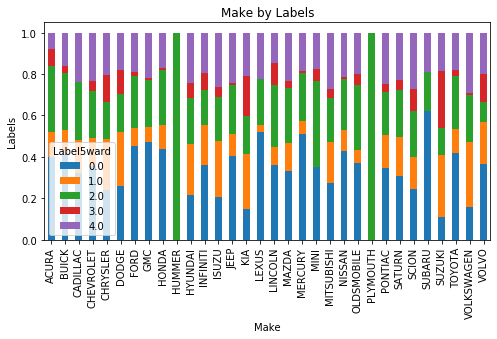




Absolute Crosstab: 
 Label5ward      0.0   1.0    2.0   3.0    4.0
Transmission                                 
AUTO          16137  8434  10585  3407  10380
MANUAL          529   384    433   178    383


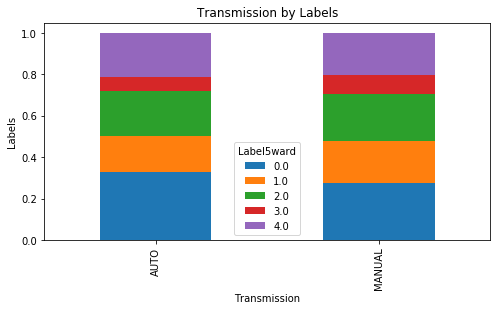




Absolute Crosstab: 
 Label5ward     0.0   1.0   2.0   3.0   4.0
WheelTypeID                               
1.0          10199  3673  6236  1118  5779
2.0           6287  5068  4665  2430  4864
3.0            180    77   117    37   120


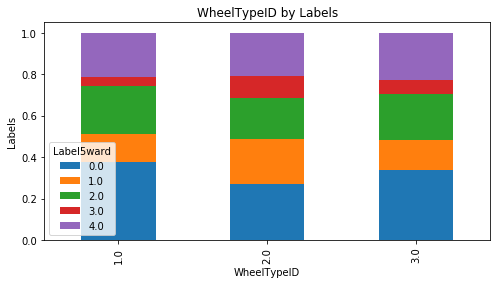




Absolute Crosstab: 
 Label5ward      0.0   1.0   2.0   3.0   4.0
Nationality                                
AMERICAN      14189  7011  9053  2712  8786
NOT AMERICAN   2477  1807  1965   873  1977


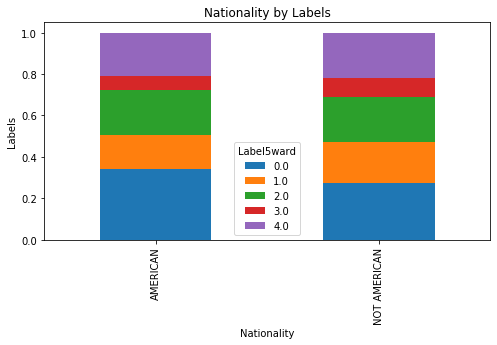




Absolute Crosstab: 
 Label5ward    0.0   1.0   2.0   3.0   4.0
Size                                     
COMPACT      1577  1090  1188   472  1214
CROSSOVER     424   142   285    40   297
LARGE        2302   667  1584   142  1489
LARGE SUV     471    66   263     5   151
LARGE TRUCK  1023   199   524    39   387
MEDIUM       5613  5128  4013  2552  4272
MEDIUM SUV   2130   633  1173   127  1174
SMALL SUV     727   123   394    14   313
SMALL TRUCK   269    80   148    23   125
SPECIALTY     322   273   387    36   367
SPORTS        191    99   131    35   157
VAN          1617   318   928   100   817


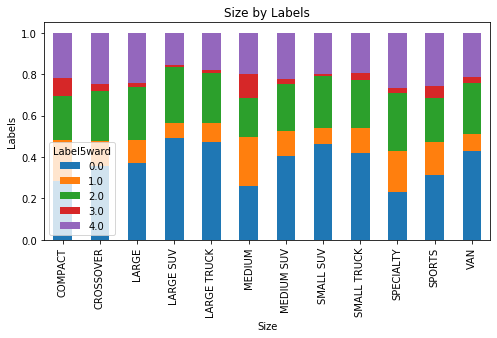




Absolute Crosstab: 
 Label5ward             0.0   1.0   2.0   3.0   4.0
TopThreeAmericanName                              
CHRYSLER              4094  3803  2910  1770  3051
FORD                  3816   734  2110   147  1594
GM                    6279  2474  4033   795  4141
OTHER                 2477  1807  1965   873  1977


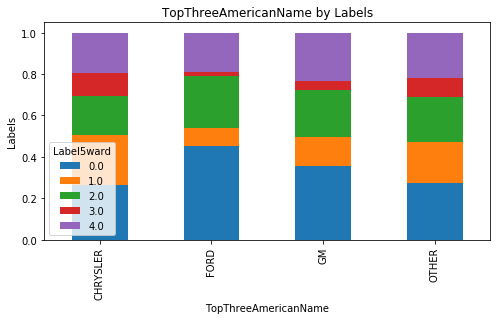




Absolute Crosstab: 
 Label5ward   0.0   1.0   2.0  3.0   4.0
VNST                                   
AL           168    57   120   21   105
AR            20     8     6    0     6
AZ          1397   712   952  334   944
CA          1666   861  1105  324  1071
CO          1300   540   787  169   733
FL          2382  1182  1581  420  1549
GA           562   273   454  100   382
IA           108    56    78   23    94
ID            36    19    30    7    23
IL            98    53    51   27    78
IN           105    52    80   13    74
KY            52    27    34   15    36
LA            94    39    45    9    53
MA             2     1     1    1     3
MD           252   112   158   42   173
MI             2     3     1    0     1
MN            15     9     9    2     9
MO           164    84   110   26    89
MS           126    69    61   18    77
NC          1699   825  1095  305  1059
NE             2     3     3    0     5
NH            27    21    13    7     9
NJ            75

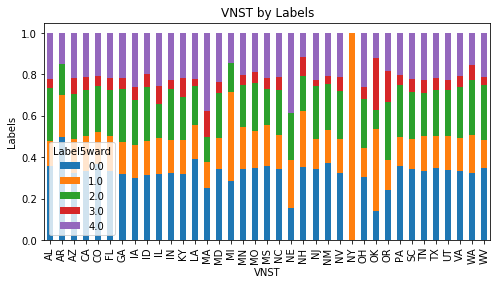




Absolute Crosstab: 
 Label5ward      0.0   1.0    2.0   3.0    4.0
IsOnlineSale                                 
0             16240  8634  10716  3497  10460
1               426   184    302    88    303


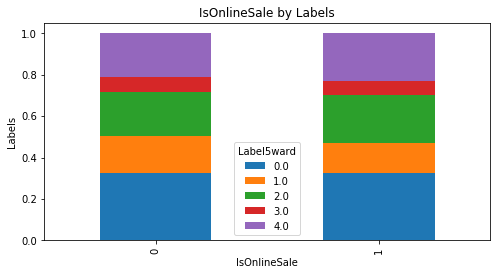




Absolute Crosstab: 
 Label5ward    0.0   1.0   2.0   3.0   4.0
Doors                                    
2D            814   418   549   162   597
3D             16     2    16     2     4
4D          13127  7715  8883  3255  8832
5D             19    12    16     1    14


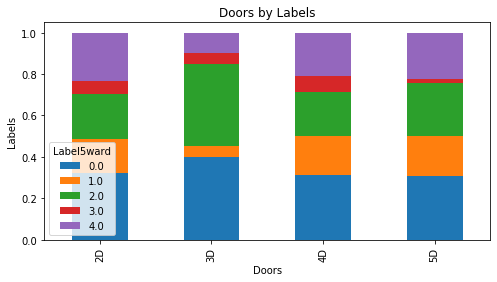




Absolute Crosstab: 
 Label5ward        0.0   1.0    2.0   3.0    4.0
Label4complete                                 
0.0             15103     0    112     0      0
1.0              1563   905  10906     0  10429
2.0                 0     0      0  1695      0
3.0                 0  7913      0  1890    334


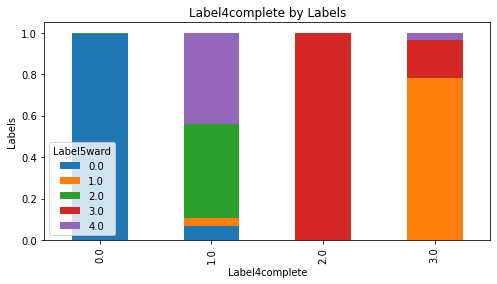




Absolute Crosstab: 
 Label5ward        0.0   1.0    2.0   3.0    4.0
Label3complete                                 
0.0              1563  8818  10906  1890  10763
1.0             15103     0    112     0      0
2.0                 0     0      0  1695      0


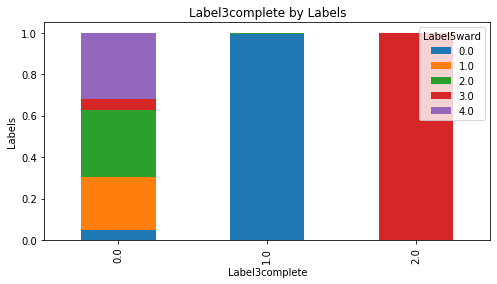




Absolute Crosstab: 
 Label5ward    0.0   1.0    2.0   3.0    4.0
Label5ward                                 
0.0         16666     0      0     0      0
1.0             0  8818      0     0      0
2.0             0     0  11018     0      0
3.0             0     0      0  3585      0
4.0             0     0      0     0  10763


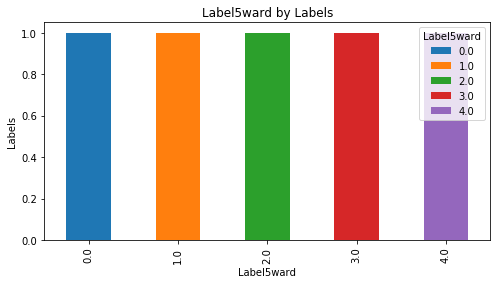




Absolute Crosstab: 
 Label5ward    0.0   1.0    2.0   3.0    4.0
Label6ward                                 
0.0             0  8818      0     0      0
1.0         13062     0      0     0      0
2.0             0     0  11018     0      0
3.0             0     0      0  3585      0
4.0             0     0      0     0  10763
5.0          3604     0      0     0      0


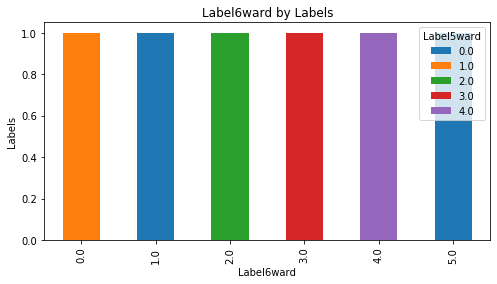

In [27]:
for col in df[categorical_columns]:
    
    absCrosstabClusters = pd.crosstab(df[col], df[Labels])
    relCrosstabClusters = absCrosstabClusters.div(absCrosstabClusters.sum(1).astype(float), axis=0)
    
    print('\n\n\nAbsolute Crosstab: \n', absCrosstabClusters)
    relCrosstabClusters.plot(kind='bar', stacked=True, title= col + ' by Labels', figsize=(8,4))
    plt.xlabel(col)
    plt.ylabel('Labels')
    plt.show()

In [21]:
from itertools import combinations as comb


 Scatter Plot VehOdo vs VehBCost


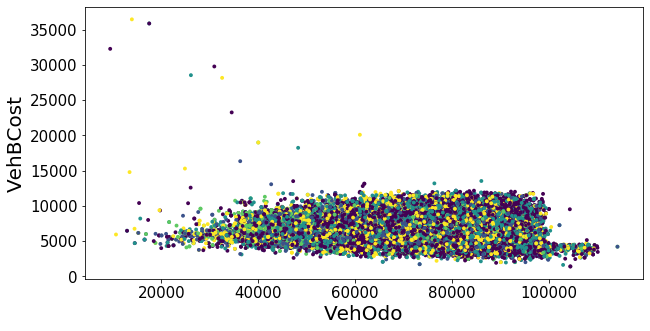


 Scatter Plot VehOdo vs MMRAcquisitionAuctionAveragePrice


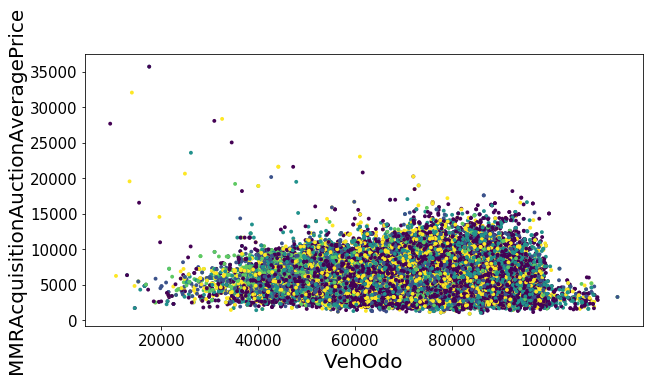


 Scatter Plot VehOdo vs VehicleAge


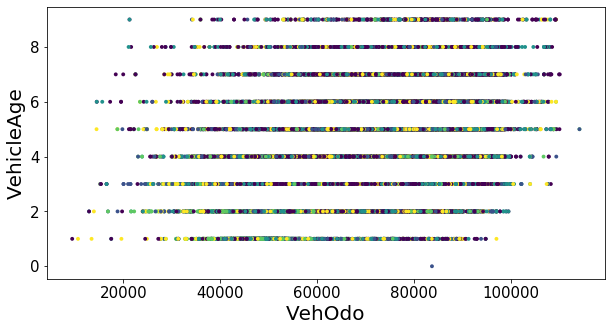


 Scatter Plot VehOdo vs CostOverOdo


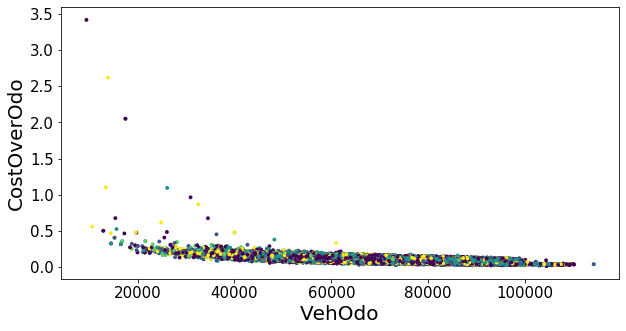


 Scatter Plot VehOdo vs WarrantyCost


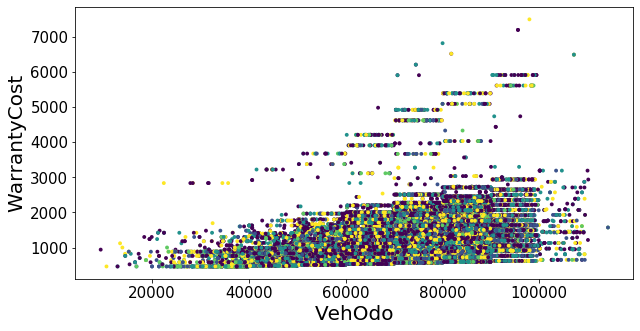


 Scatter Plot VehBCost vs MMRAcquisitionAuctionAveragePrice


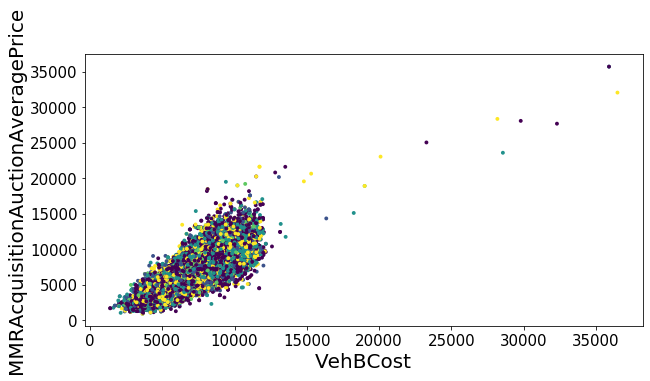


 Scatter Plot VehBCost vs VehicleAge


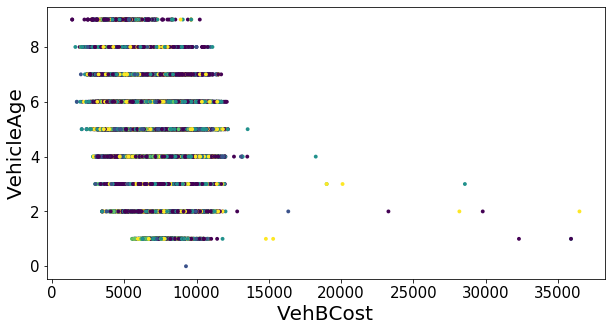


 Scatter Plot VehBCost vs CostOverOdo


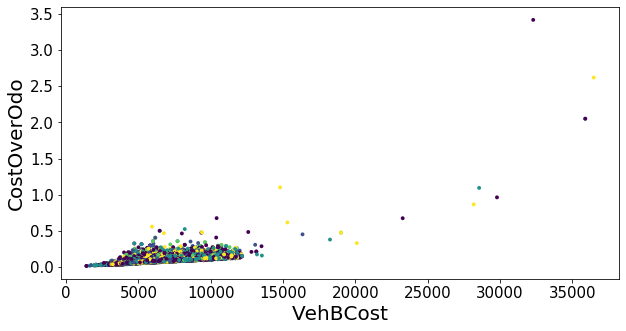


 Scatter Plot VehBCost vs WarrantyCost


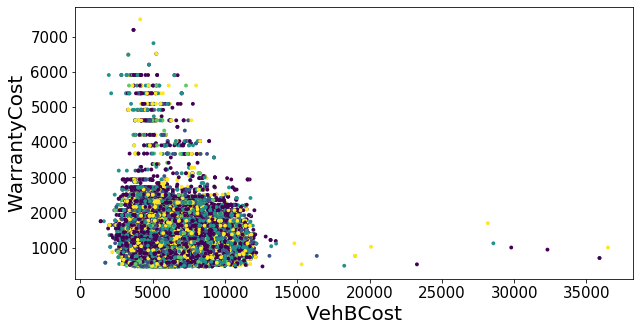


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs VehicleAge


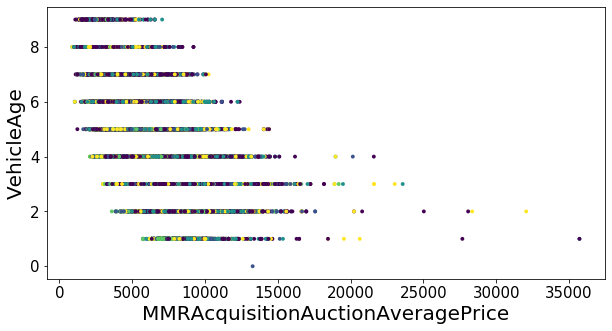


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs CostOverOdo


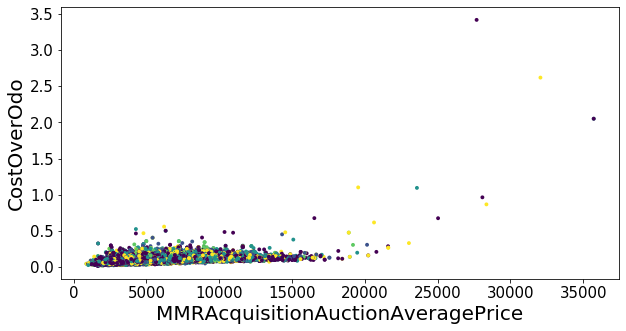


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs WarrantyCost


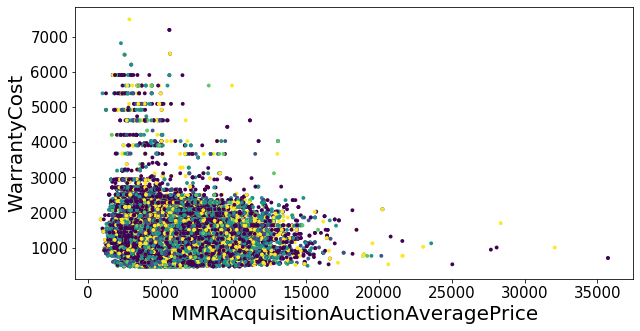


 Scatter Plot VehicleAge vs CostOverOdo


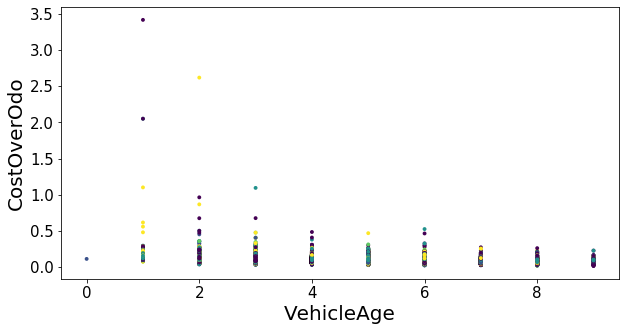


 Scatter Plot VehicleAge vs WarrantyCost


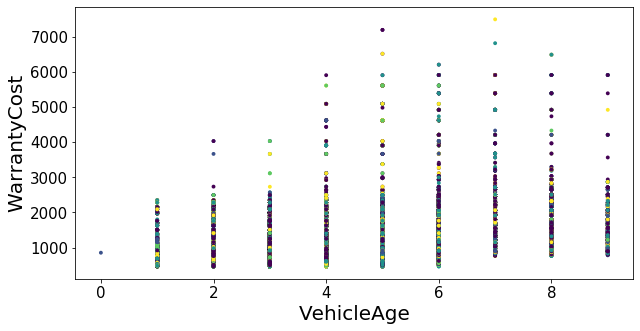


 Scatter Plot CostOverOdo vs WarrantyCost


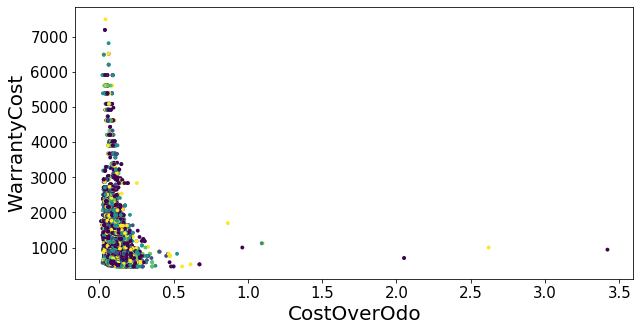

In [28]:
for col in list(comb(numerical_columns,2)):
    
    print('\n Scatter Plot ' + str(col[0]) + ' vs ' + str(col[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(df[col[0]], df[col[1]], c = df[Labels], s=15, edgecolor='')
    plt.xlabel(str(col[0]))
    plt.ylabel(str(col[1]))
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

In [29]:
Labels = df.columns[-1]
Labels

'Label6ward'




Absolute Crosstab: 
 Label6ward  0.0  1.0  2.0  3.0  4.0  5.0
PurchDate                               
2009-01     267  520  423   85  400  166
2009-02     343  587  521  133  432  161
2009-03     288  567  463   86  507  181
2009-04     378  690  586  119  538  191
2009-05     374  569  434  131  406  154
2009-06     258  509  397   88  363  130
2009-07     433  588  494  130  469  140
2009-08     432  613  510  186  478  178
2009-09     405  583  460  164  504  167
2009-10     454  661  588  154  596  186
2009-11     334  474  377  124  378  106
2009-12     296  398  332  136  369   98
2010-01     415  547  461  209  472  149
2010-02     441  535  457  198  442  138
2010-03     359  511  404  180  421  142
2010-04     388  490  448  163  421  157
2010-05     346  466  398  178  398  134
2010-06     404  535  439  180  440  146
2010-07     348  584  519  148  535  147
2010-08     340  493  368  133  397  144
2010-09     410  599  521  184  466  141
2010-10     412  599  538  199  5

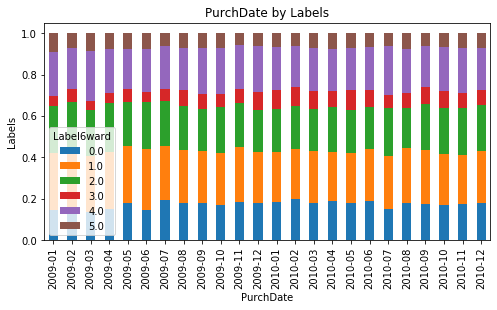




Absolute Crosstab: 
 Label6ward            0.0   1.0   2.0   3.0   4.0   5.0
SubModel                                               
ACCESS CAB              0     1     1     0     1     0
BASE                    1     0     0     0     0     0
CARGO                   0     0     1     0     0     0
CARGO EXT               0     2     0     0     0     0
CONVERTIBLE            87    63    67    34    86    21
CONVERTIBLE HARDTOP     0     0     2     0     0     0
CONVERTIBLE SUV         0     0     1     0     0     1
COUPE                 282   477   414   107   449   173
COUPE QUAD             21    24    30     5    25     5
CREW CAB               19   120    84     3    47    52
CROSSOVER               4    14    16     4     4     1
CUV                   132   439   310    30   243    80
DOUBLE CAB              0     5     3     0     2     2
EXT CAB                91   313   198    19   174   103
HARDTOP                 1     0     2     1     0     0
HATCHBACK              2

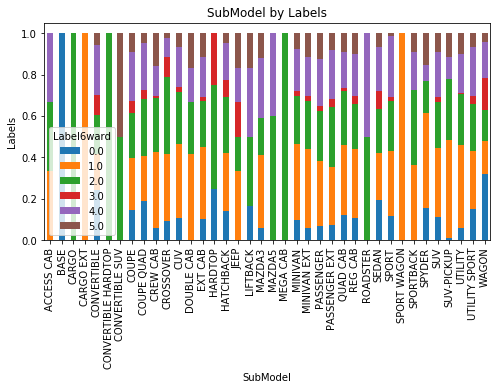




Absolute Crosstab: 
 Label6ward   0.0    1.0   2.0   3.0   4.0   5.0
IsBadBuy                                       
0           7778  11369  9608  3228  9463  3002
1           1040   1693  1410   357  1300   602


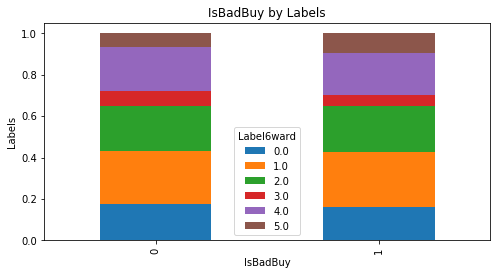




Absolute Crosstab: 
 Label6ward   0.0   1.0   2.0   3.0   4.0   5.0
Auction                                       
ADESA       1639  2710  2291   582  2194   752
MANHEIM     4446  7619  6393  1574  6134  2067
OTHER       2733  2733  2334  1429  2435   785


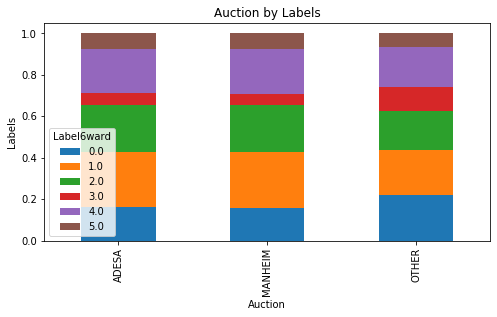




Absolute Crosstab: 
 Label6ward   0.0   1.0   2.0  3.0   4.0  5.0
VehicleAge                                  
0              1     0     0    0     0    0
1            813   251   254  672   265   76
2           1532  1164  1173  906  1148  202
3           2075  2612  2387  745  2684  402
4           2007  2927  2549  573  2776  713
5           1214  2566  2039  354  1888  746
6            609  1795  1348  180  1092  617
7            373  1106   786   88   553  506
8            145   494   381   60   280  247
9             49   147   101    7    77   95


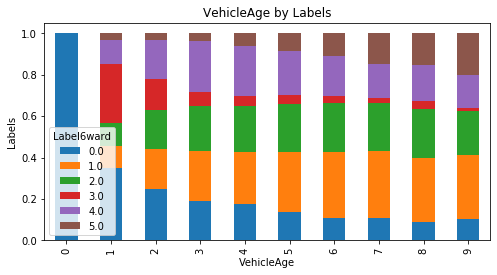




Absolute Crosstab: 
 Label6ward   0.0   1.0   2.0  3.0   4.0  5.0
Make                                        
ACURA          3     8     8    2     2    2
BUICK         63   172   153   17    89   55
CADILLAC       4     6     7    0     6    2
CHEVROLET   1587  3416  2746  565  2818  856
CHRYSLER    1565  1242  1143  813  1307  273
DODGE       2120  1672  1513  946  1481  473
FORD         683  2530  1929  132  1455  906
GMC           29   156    95    3    91   39
HONDA         44   125    99    4    64   40
HUMMER         0     0     1    0     0    0
HYUNDAI      344   246   308  102   339   55
INFINITI       7     8     6    3     7    5
ISUZU         28    18    22    5    27    3
JEEP         118   369   253   11   263   67
KIA          499   238   339  353   389   33
LEXUS          1     7     6    0     6    7
LINCOLN        6    18    20    7    10    6
MAZDA        102   216   200   23   176   30
MERCURY       45   256   161    8   129  100
MINI           0     4     7   

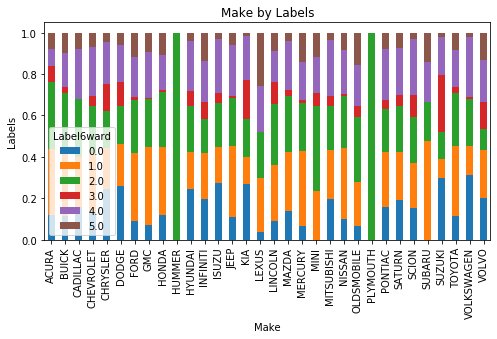




Absolute Crosstab: 
 Label6ward     0.0    1.0    2.0   3.0    4.0   5.0
Transmission                                       
AUTO          8434  12662  10585  3407  10380  3475
MANUAL         384    400    433   178    383   129


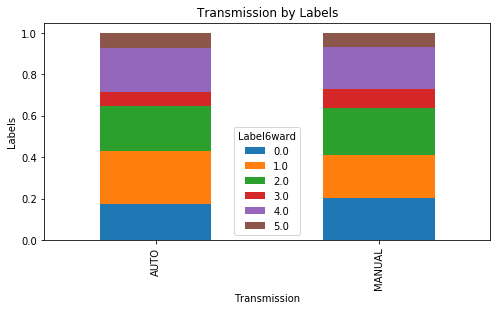




Absolute Crosstab: 
 Label6ward    0.0   1.0   2.0   3.0   4.0   5.0
WheelTypeID                                    
1.0          3673  7895  6236  1118  5779  2304
2.0          5068  5024  4665  2430  4864  1263
3.0            77   143   117    37   120    37


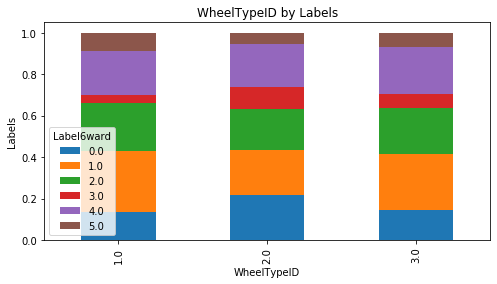




Absolute Crosstab: 
 Label6ward     0.0    1.0   2.0   3.0   4.0   5.0
Nationality                                      
AMERICAN      7011  11029  9053  2712  8786  3160
NOT AMERICAN  1807   2033  1965   873  1977   444


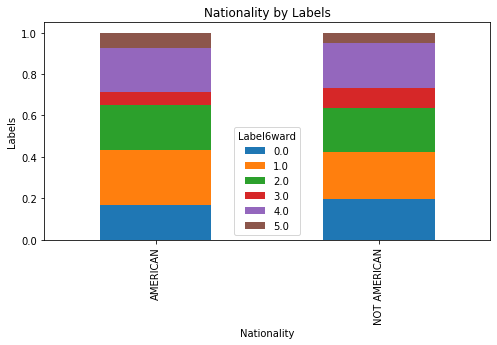




Absolute Crosstab: 
 Label6ward    0.0   1.0   2.0   3.0   4.0   5.0
Size                                           
COMPACT      1090  1128  1188   472  1214   449
CROSSOVER     142   389   285    40   297    35
LARGE         667  1944  1584   142  1489   358
LARGE SUV      66   303   263     5   151   168
LARGE TRUCK   199   774   524    39   387   249
MEDIUM       5128  4268  4013  2552  4272  1345
MEDIUM SUV    633  1715  1173   127  1174   415
SMALL SUV     123   612   394    14   313   115
SMALL TRUCK    80   206   148    23   125    63
SPECIALTY     273   281   387    36   367    41
SPORTS         99   162   131    35   157    29
VAN           318  1280   928   100   817   337


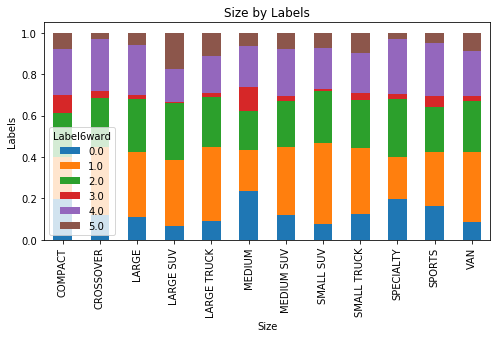




Absolute Crosstab: 
 Label6ward             0.0   1.0   2.0   3.0   4.0   5.0
TopThreeAmericanName                                    
CHRYSLER              3803  3281  2910  1770  3051   813
FORD                   734  2804  2110   147  1594  1012
GM                    2474  4944  4033   795  4141  1335
OTHER                 1807  2033  1965   873  1977   444


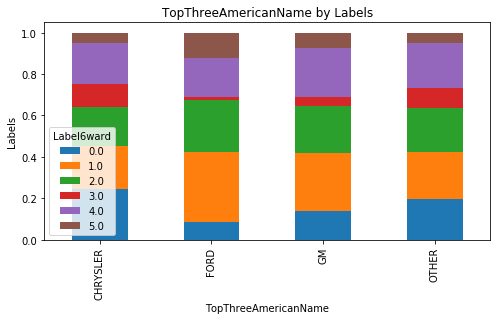




Absolute Crosstab: 
 Label6ward   0.0   1.0   2.0  3.0   4.0  5.0
VNST                                        
AL            57   141   120   21   105   27
AR             8    15     6    0     6    5
AZ           712  1089   952  334   944  308
CA           861  1316  1105  324  1071  350
CO           540   986   787  169   733  314
FL          1182  1864  1581  420  1549  518
GA           273   437   454  100   382  125
IA            56    86    78   23    94   22
ID            19    29    30    7    23    7
IL            53    82    51   27    78   16
IN            52    78    80   13    74   27
KY            27    34    34   15    36   18
LA            39    81    45    9    53   13
MA             1     1     1    1     3    1
MD           112   196   158   42   173   56
MI             3     1     1    0     1    1
MN             9    11     9    2     9    4
MO            84   133   110   26    89   31
MS            69   100    61   18    77   26
NC           825  1361  1095  3

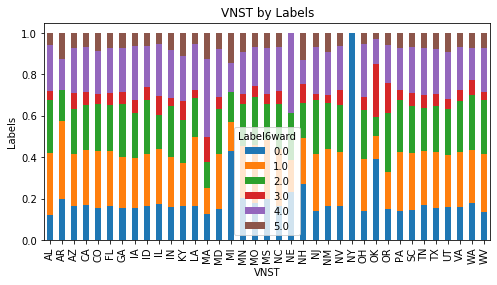




Absolute Crosstab: 
 Label6ward     0.0    1.0    2.0   3.0    4.0   5.0
IsOnlineSale                                       
0             8634  12749  10716  3497  10460  3491
1              184    313    302    88    303   113


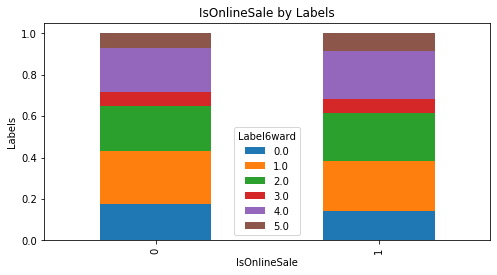




Absolute Crosstab: 
 Label6ward   0.0    1.0   2.0   3.0   4.0   5.0
Doors                                          
2D           418    604   549   162   597   210
3D             2     10    16     2     4     6
4D          7715  10323  8883  3255  8832  2804
5D            12     17    16     1    14     2


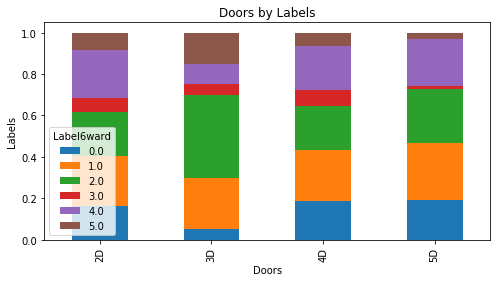




Absolute Crosstab: 
 Label6ward       0.0    1.0    2.0   3.0    4.0   5.0
Label4complete                                       
0.0                0  11499    112     0      0  3604
1.0              905   1563  10906     0  10429     0
2.0                0      0      0  1695      0     0
3.0             7913      0      0  1890    334     0


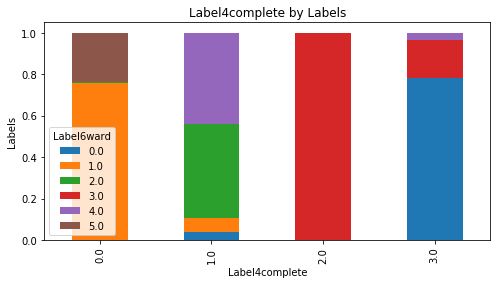




Absolute Crosstab: 
 Label6ward       0.0    1.0    2.0   3.0    4.0   5.0
Label3complete                                       
0.0             8818   1563  10906  1890  10763     0
1.0                0  11499    112     0      0  3604
2.0                0      0      0  1695      0     0


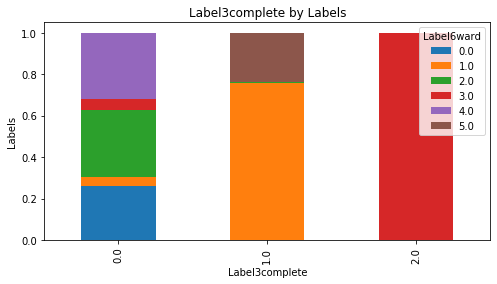




Absolute Crosstab: 
 Label6ward   0.0    1.0    2.0   3.0    4.0   5.0
Label5ward                                       
0.0            0  13062      0     0      0  3604
1.0         8818      0      0     0      0     0
2.0            0      0  11018     0      0     0
3.0            0      0      0  3585      0     0
4.0            0      0      0     0  10763     0


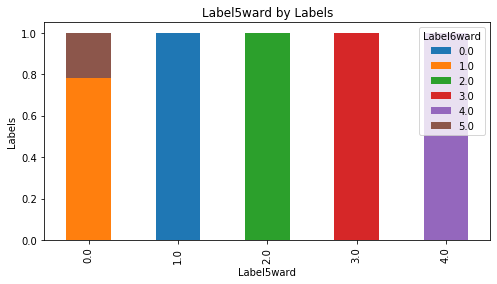




Absolute Crosstab: 
 Label6ward   0.0    1.0    2.0   3.0    4.0   5.0
Label6ward                                       
0.0         8818      0      0     0      0     0
1.0            0  13062      0     0      0     0
2.0            0      0  11018     0      0     0
3.0            0      0      0  3585      0     0
4.0            0      0      0     0  10763     0
5.0            0      0      0     0      0  3604


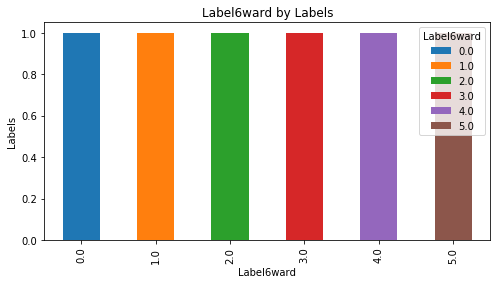

In [30]:
for col in df[categorical_columns]:
    
    absCrosstabClusters = pd.crosstab(df[col], df[Labels])
    relCrosstabClusters = absCrosstabClusters.div(absCrosstabClusters.sum(1).astype(float), axis=0)
    
    print('\n\n\nAbsolute Crosstab: \n', absCrosstabClusters)
    relCrosstabClusters.plot(kind='bar', stacked=True, title= col + ' by Labels', figsize=(8,4))
    plt.xlabel(col)
    plt.ylabel('Labels')
    plt.show()

In [21]:
from itertools import combinations as comb


 Scatter Plot VehOdo vs VehBCost


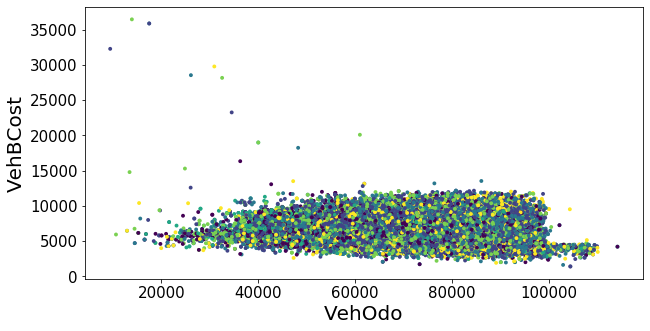


 Scatter Plot VehOdo vs MMRAcquisitionAuctionAveragePrice


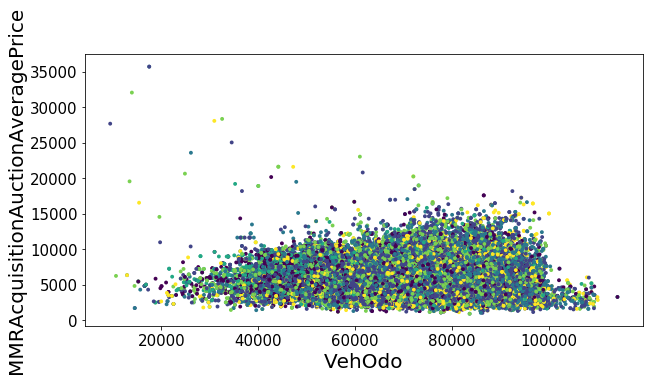


 Scatter Plot VehOdo vs VehicleAge


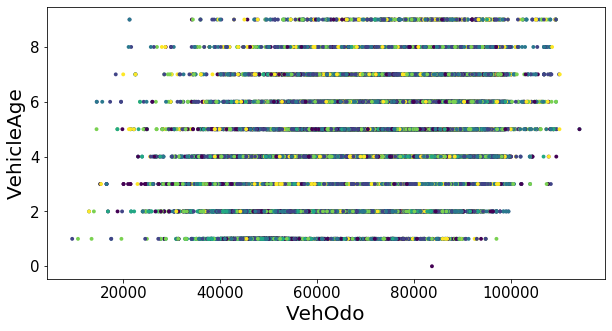


 Scatter Plot VehOdo vs CostOverOdo


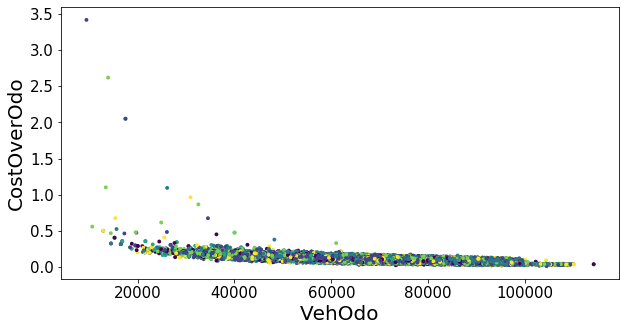


 Scatter Plot VehOdo vs WarrantyCost


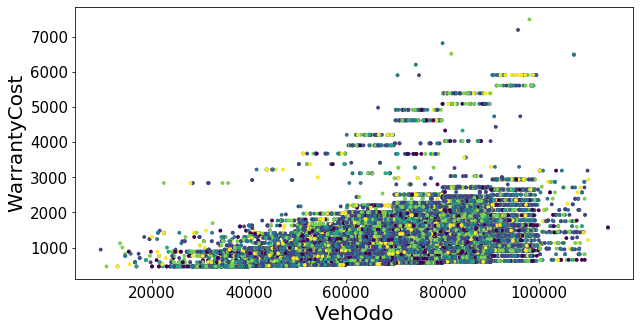


 Scatter Plot VehBCost vs MMRAcquisitionAuctionAveragePrice


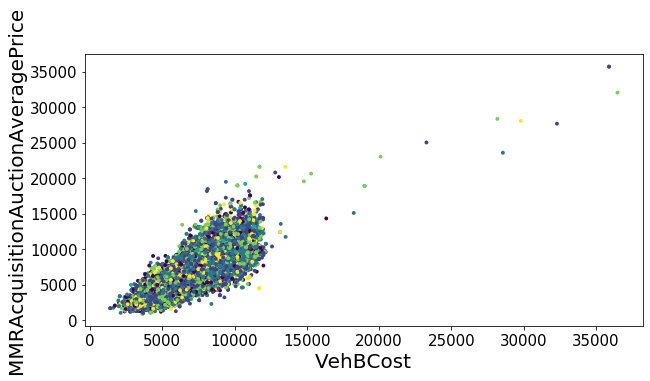


 Scatter Plot VehBCost vs VehicleAge


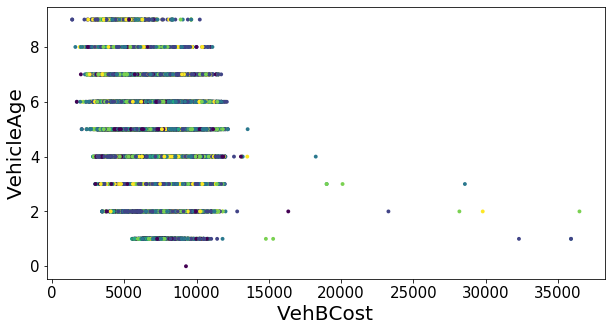


 Scatter Plot VehBCost vs CostOverOdo


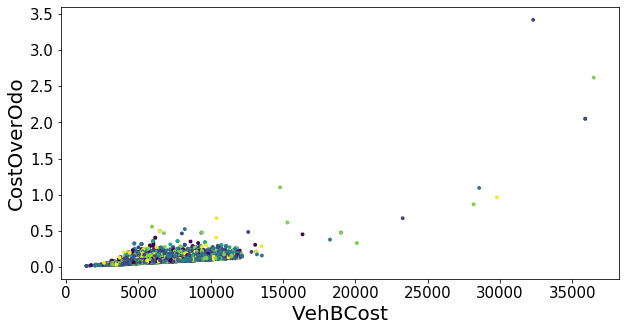


 Scatter Plot VehBCost vs WarrantyCost


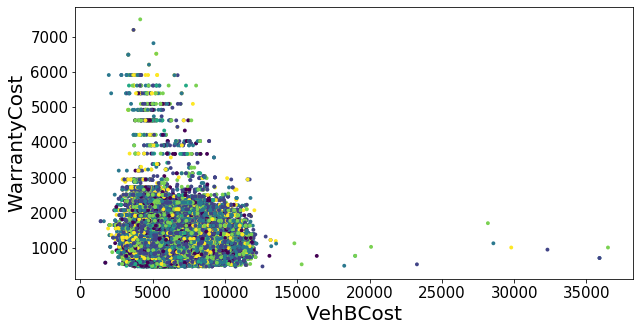


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs VehicleAge


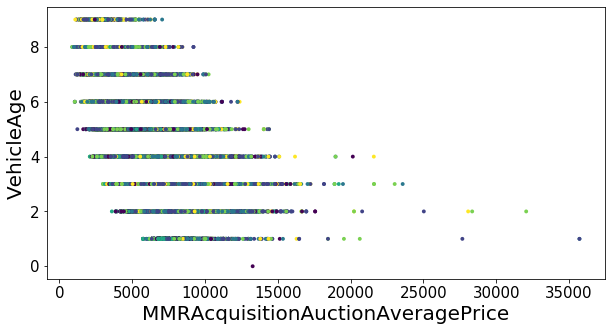


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs CostOverOdo


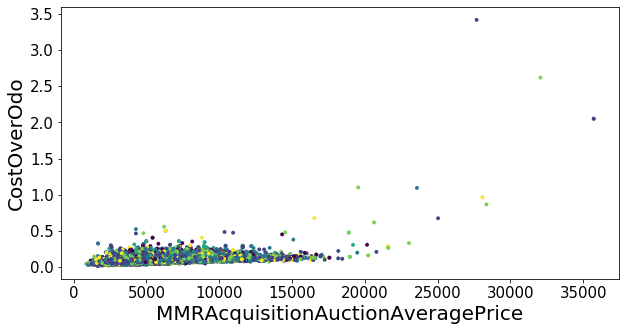


 Scatter Plot MMRAcquisitionAuctionAveragePrice vs WarrantyCost


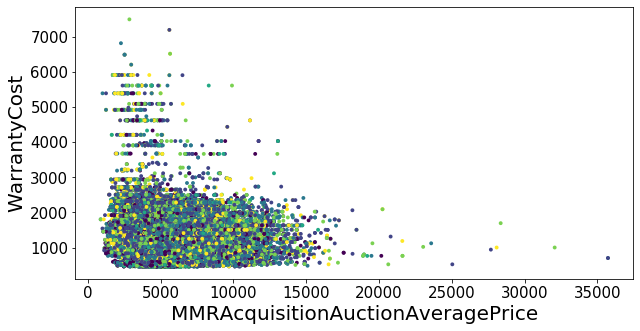


 Scatter Plot VehicleAge vs CostOverOdo


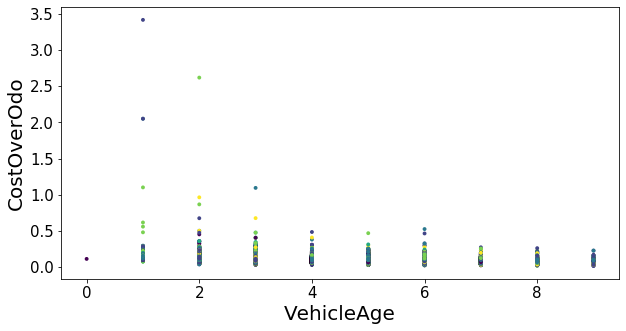


 Scatter Plot VehicleAge vs WarrantyCost


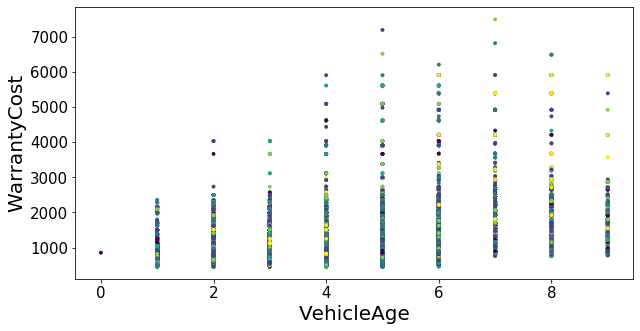


 Scatter Plot CostOverOdo vs WarrantyCost


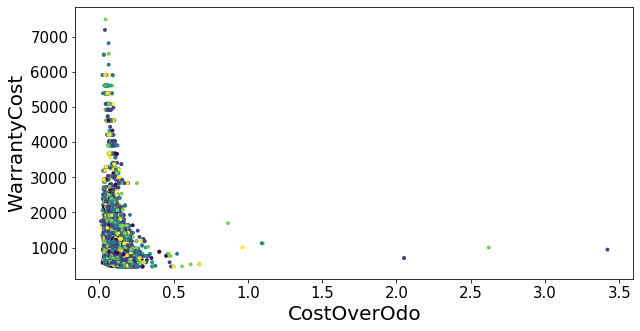

In [31]:
for col in list(comb(numerical_columns,2)):
    
    print('\n Scatter Plot ' + str(col[0]) + ' vs ' + str(col[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(df[col[0]], df[col[1]], c = df[Labels], s=15, edgecolor='')
    plt.xlabel(str(col[0]))
    plt.ylabel(str(col[1]))
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()